# IMPORTING Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats


# IMPORTING Data-set

In [2]:
swiggy_data= pd.read_csv("swiggy.csv")
swiggy_data.head(5)

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,300,4.4,100,"Biryani,Chinese,North-Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650,4.4,100,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250,3.9,500,"North-Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350,4.0,50,"Rajasthani,Gujarati,North-Indian,Snacks,Desser...",80 Feet Road,63


# EDA

In [3]:
swiggy_data.describe()

,ID,Price,Avg ratings,Total ratings,Delivery time
count,8680.000000,8680.000000,8680.000000,8680.000000,8680.000000
mean,244812.071429,348.444470,3.655104,156.634793,53.967051
std,158671.617188,230.940074,0.647629,391.448014,14.292335
min,211.000000,0.000000,2.000000,20.000000,20.000000
25%,72664.000000,200.000000,2.900000,50.000000,44.000000
50%,283442.000000,300.000000,3.900000,80.000000,53.000000
75%,393425.250000,400.000000,4.200000,100.000000,64.000000
max,466928.000000,2500.000000,5.000000,10000.000000,109.000000


After using describe(), we found out certain details:-

1> The **STD=230.94** it represents the average distance of the data points from the **MEAN**.

2> The **MINIMUM** value in the **PRICE** is 0. So, we have to check if there are other values less than 10, as the values less than 10 won't be concidered for the **PRICE** segment. Because the minimum price of a thing we can order from a resturant should be 10.

3> The Average Rating of the resturants in the data-set is 3.6 

4> The Average Delivery Time taken is 53.96 mins (54 mins). The minimum time taken is 20 min and the Maximum time take is 1hr 49min

#### Checking out the **PRICE** less than 10

In [4]:
price_lessThan_10= swiggy_data[swiggy_data["Price"]<10]
price_lessThan_10

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
1054,48742,Chembur,Mumbai,230 Celsius,1,4.1,100,"Italian,Continental",Tilak Nagar,60
1393,73662,Annanagar East,Chennai,Mozza,0,2.9,80,"Continental,Chinese,Italian,Mexican",Annangar East,64
2830,283144,Athwa,Surat,Monginis,0,2.9,80,Desserts,Udhyognagar,46
5030,408696,Charminar,Hyderabad,Tajis Food Court,2,2.9,80,"Indian,South Indian,Chinese,Arabian",Charminar,68
5871,443938,Swargate,Pune,Wok N Roll,1,2.9,80,"Chinese,Snacks",Swargate,39
6125,451785,T Nagar,Chennai,Murugappa Mess,1,2.9,80,"South Indian,Indian,Desserts",T Nagar,73
6371,463545,George Town,Chennai,Food Corner Family Restaurent,1,2.9,80,"South Indian,Chinese,Beverages",George Town,60
6995,55365,Isanpur,Ahmedabad,Maruti Dhosa Hub,0,4.1,20,South Indian,Vishal Nagar,49
6999,55710,Paldi,Ahmedabad,Ladli Fast Food,0,3.5,20,"Fast-Food,Italian",Paldi,34
7218,77391,Ghodasar,Ahmedabad,Comfy Restaurant,0,4.0,100,"Indian,Chinese",Isanpur,48


In [5]:
price_lessThan_10.index

Index([1054, 1393, 2830, 5030, 5871, 6125, 6371, 6995, 6999, 7218, 8628, 8659], dtype='int64')

In [6]:
swiggy_data_edit_1= swiggy_data.drop(index=[1054, 1393, 2830, 5030, 5871, 6125, 6371, 6995, 6999, 7218, 8628, 8659])
swiggy_data_edit_1.head(5)

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,300,4.4,100,"Biryani,Chinese,North-Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650,4.4,100,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250,3.9,500,"North-Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350,4.0,50,"Rajasthani,Gujarati,North-Indian,Snacks,Desser...",80 Feet Road,63


In [7]:
swiggy_data_edit_1.describe()

,ID,Price,Avg ratings,Total ratings,Delivery time
count,8668.000000,8668.000000,8668.000000,8668.000000,8668.000000
mean,244772.830411,348.925358,3.655676,156.750115,53.966890
std,158629.857903,230.737657,0.647623,391.705532,14.295451
min,211.000000,10.000000,2.000000,20.000000,20.000000
25%,72664.000000,200.000000,2.900000,50.000000,44.000000
50%,283442.000000,300.000000,3.900000,80.000000,53.000000
75%,393385.250000,400.000000,4.200000,100.000000,64.000000
max,466928.000000,2500.000000,5.000000,10000.000000,109.000000


# Grouping Data by CITY

In [8]:
grouping_cities= swiggy_data_edit_1.groupby("City")
grouping_cities

## Top 3 areas with most resturant in different cities and In these areas which are the resturants having average rating GREATER than 4.5


### Function

In [9]:
class City_Top_Areas:
    def __init__(self, dataframe):
        self.dataframe = dataframe  ## Takes in the Dataframe (get_group() dataframe)
    
    def describe(self):
        return self.dataframe.describe() ## Describes the DataFrame
    
    def count_of_unique_areas(self): ## Counts the total number of Unique Places in the city were resturants are located in the Dataframe
        return self.dataframe["Area"].nunique() 
    
    def top_3_areas(self): ## Gives the count of resturants in the particular areas of the city. Here, TOP 3 Places with maximum resturants.
        count_maximum_resturants = self.dataframe["Area"].value_counts().nlargest(n=3)
        df_count_maximum_resturants = count_maximum_resturants
        return df_count_maximum_resturants
    
    def most_visited_resturants_in_city(self): ## Gives a DATAFRAME containing of the MOST VISITIED resturants from the TOP 3 Places with maximum resturants in the city. Here, if the "Total ratings" is 500 or more than the resturants are most visited
        count_of_maximum_resturants = self.dataframe["Area"].value_counts().nlargest(n=3)
        df_count_of_maximum_resturants = count_of_maximum_resturants.reset_index()
        
        places = []
        for i in df_count_of_maximum_resturants["Area"]:
            places.append(i)
        
        #max_customers = self.dataframe["Total ratings"].max()
        most_visited_resturant = self.dataframe[(self.dataframe["Area"].isin(places)) & (self.dataframe["Total ratings"] >= 500)]
        return most_visited_resturant
    
    def top_resturants_avg_rating(self): ## Gives a DATAFRAME containing the resturants having Average Rating GREATER than or equal to 4.5, from the TOP 3 Places with maximum resturants in the city.
        count_of_maximum_resturant = self.dataframe["Area"].value_counts().nlargest(n=3)
        df_count_of_maximum_resturant = count_of_maximum_resturant.reset_index()
        
        places = []
        for i in df_count_of_maximum_resturant["Area"]:
            places.append(i)
        
        top_resturants = self.dataframe[(self.dataframe["Area"].isin(places)) & (self.dataframe["Avg ratings"] >= 4.5)]
        return top_resturants

## Ahmedabad

In [10]:
Ahmedabad_data= grouping_cities.get_group("Ahmedabad")
Ahmedabad_data.head(5)

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
814,35755,Navrangpura,Ahmedabad,R.K. Omlet Centre,200,4.3,100,"Fast-Food,Mughlai,Snacks",Navrangpura,48
815,35791,Navrangpura,Ahmedabad,D'Tallii Egg,400,4.5,20,Indian,Navrangpura,35
819,35971,Ellisbridge,Ahmedabad,Foodinn - Fine Dine,800,4.0,100,"Indian,Chinese,Continental",Ashram Road,31
820,35981,University Area,Ahmedabad,Sandwichworkz - The Fusion Street Cafe,300,4.3,100,"South Indian,Continental",Panjra Pole,47
823,36174,University Area,Ahmedabad,Sphere Lounge,550,4.3,100,"Mexican,Italian,Indian",Navrangpura,44


In [11]:
Ahmedabad_data.describe()

,ID,Price,Avg ratings,Total ratings,Delivery time
count,713.000000,713.000000,713.000000,713.000000,713.000000
mean,239514.998597,319.906031,3.596353,104.137447,44.715288
std,154844.349916,173.778161,0.642557,151.733867,10.899129
min,35753.000000,50.000000,2.400000,20.000000,24.000000
25%,68204.000000,200.000000,2.900000,50.000000,37.000000
50%,262390.000000,300.000000,3.800000,80.000000,44.000000
75%,391434.000000,400.000000,4.200000,100.000000,49.000000
max,466488.000000,1500.000000,4.800000,1000.000000,90.000000


In [12]:
Ahmedabad_func_data= City_Top_Areas(Ahmedabad_data)
Ahmedabad_func_data

In [13]:
Ahmedabad_func_data.describe()

,ID,Price,Avg ratings,Total ratings,Delivery time
count,713.000000,713.000000,713.000000,713.000000,713.000000
mean,239514.998597,319.906031,3.596353,104.137447,44.715288
std,154844.349916,173.778161,0.642557,151.733867,10.899129
min,35753.000000,50.000000,2.400000,20.000000,24.000000
25%,68204.000000,200.000000,2.900000,50.000000,37.000000
50%,262390.000000,300.000000,3.800000,80.000000,44.000000
75%,391434.000000,400.000000,4.200000,100.000000,49.000000
max,466488.000000,1500.000000,4.800000,1000.000000,90.000000


In [14]:
count_of_unique_areas_of_Ahmedabad= Ahmedabad_func_data.count_of_unique_areas()
count_of_unique_areas_of_Ahmedabad

80

#### Top 3 areas with most resturants in Ahmedabad

In [15]:
Ahmedabad_top_3_AREAS= Ahmedabad_func_data.top_3_areas()
Ahmedabad_top_3_AREAS

Area
Navrangpura    131
Vastrapur       94
Ellisbridge     50
Name: count, dtype: int64

Text(0, 0.5, 'Count of resturants')

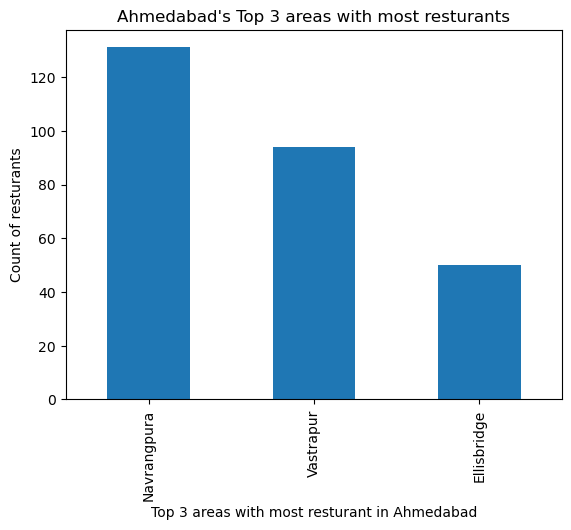

In [16]:
plt.title("Ahmedabad's Top 3 areas with most resturants")
Ahmedabad_top_3_AREAS.plot.bar()
plt.xlabel("Top 3 areas with most resturant in Ahmedabad")
plt.ylabel("Count of resturants")

#### The most visted resturants of the top 3 areas 

In [17]:
Most_visited_Ahmedabad= Ahmedabad_func_data.most_visited_resturants_in_city()
Most_visited_Ahmedabad

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
825,36191,Vastrapur,Ahmedabad,R.K. Egg Eatery,300,4.0,1000,"Fast-Food,Indian,Mughlai,Snacks",Vastrapur,44
856,37689,Ellisbridge,Ahmedabad,Mcdonald'S,400,4.3,500,"American,Fast-Food",Cg Road,29
865,37933,Vastrapur,Ahmedabad,Faasos - Wraps & Rolls,200,4.2,500,"Combo,Snacks,Beverages,Desserts,Indian",Hotel Shahi Palace,44
1049,48390,Vastrapur,Ahmedabad,Anjoy Late Night Meals,250,4.1,1000,Indian,Bodakdev,37
1464,81814,Ellisbridge,Ahmedabad,Burger King,350,4.2,1000,"American,Fast-Food",3Rd Eye Ii Ellis Bridge Cg Road,33
2514,238436,Vastrapur,Ahmedabad,Taco Bell,300,3.8,500,Mexican,Ahmedabad One Mall,56
3967,361592,Vastrapur,Ahmedabad,Hl Frankie,150,4.0,500,"Fast-Food,Italian,Chinese,Snacks",Vastrapur,44
6756,36192,Navrangpura,Ahmedabad,R.K.Centre,200,4.1,500,"Fast-Food,South Indian,Pizzas,Pastas,Chinese",Navrangpura,38
6765,36676,Navrangpura,Ahmedabad,Jugaad Nights,400,4.3,500,"Combo,Thalis,Indian,Chinese,North-Indian,Bever...",Navrangpura,35
6779,37578,Navrangpura,Ahmedabad,Gwalia Sweets & Fast Food,250,4.3,1000,"Sweets,North-Indian,Chaat,Snacks,Bakery,Desser...",Navrangpura,37


### Resturants of top 3 places in Ahmedabad having average rating of 4.5 or greater

In [18]:
Ahmedabad_top_resturants= Ahmedabad_func_data.top_resturants_avg_rating()
Ahmedabad_top_resturants

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
815,35791,Navrangpura,Ahmedabad,D'Tallii Egg,400,4.5,20,Indian,Navrangpura,35
827,36333,Vastrapur,Ahmedabad,The Blue Oven,600,4.5,100,"Continental,Pizzas,Cafe,Pastas,Desserts",Vastrapur,50
1066,49332,Vastrapur,Ahmedabad,Caffix The Tech Cafe,450,4.6,20,"Chinese,North-Indian,Continental",Vastrapur,48
5205,416291,Vastrapur,Ahmedabad,The South Spot,400,4.7,20,South Indian,Vastrapur,49
5261,419255,Vastrapur,Ahmedabad,Wakka Makka,400,4.6,20,"Chinese,Asian,Beverages",Vastrapur,48
5262,419306,Vastrapur,Ahmedabad,Hot Lee Chinese,400,4.6,50,"Chinese,Asian,Beverages",Vastrapur,49
6010,448329,Vastrapur,Ahmedabad,Ching Chong Chinese,400,4.8,20,"Chinese,Asian,Beverages",Vastrapur,45
6114,451489,Navrangpura,Ahmedabad,Wok On Fire - Indo Chinese - Pan Asian,500,4.8,50,"Chinese,Thai,Asian",Navrangpura,40
6786,37953,Navrangpura,Ahmedabad,Natural Ice Cream,150,4.8,100,Ice Cream,Shree Krishna Centre Near Mithakhali Six Road,30
6981,54414,Navrangpura,Ahmedabad,Cheers,250,4.7,50,"Desserts,Beverages",C G Road,31


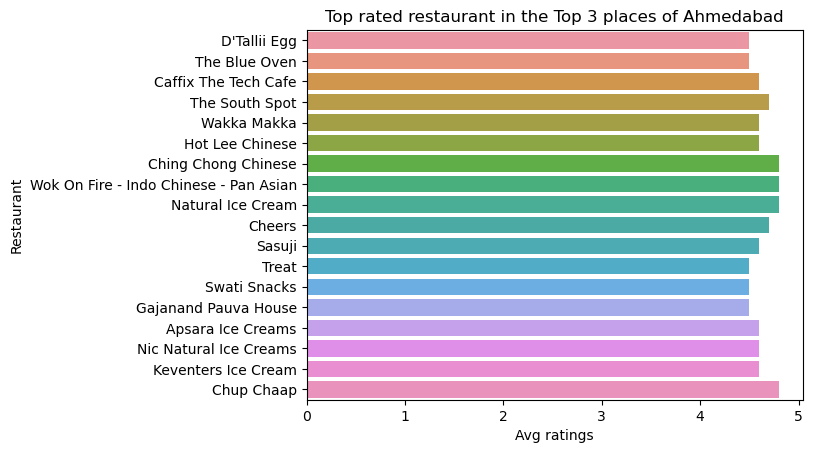

In [19]:
plt.title("Top rated restaurant in the Top 3 places of Ahmedabad")
price_top_rated= sns.barplot(Ahmedabad_top_resturants, y= Ahmedabad_top_resturants["Restaurant"], x=Ahmedabad_top_resturants["Avg ratings"],orient='h')

Analysis about Ahmedabad:-

In the city of **Ahmedabad** there are a total of 713 resturants in 80 different areas of the city. Out of these 713 resturants the top 3 areas having the most resturants are ***Navrangpura*** with 131 resturants, ***Vastrapur*** with 94 resturants and ***Ellisbridge*** with 50 resturants covering around 38.56% of the total resturants in the city.

    Out of the 275 resturants from the Top 3 Areas of the city, only a total of 18 resturants are having average ratings 4.5 and above through which can assume that the food and the quality of these resturants are very good. Moreover, we can also see that only 21 resturants are most visted in these areas.

Conclusions:-

 1> Since, more customers prefer ordering from these 6 resturants even when their Avg Rating are below 4.5, we can assume that it because the price of the food for a single person is less then the price of the resturants having Avg Rating of 4.5 and higher.

 2> From the "Total ratings" we can assume that some of resturants from those 18 resturants gets less orders even when they are well rated. This could be due to less advertizements of these resturants OR could be due to less offeres in these resturants. 
     We can advice these resturants to generate offers twice or thrice in a month since their Price is high for the customers. This might give a boost to their business as customers might start ordering seeing the offers of the resturants and could experience the resturants foods and quality.

3> For Swiggy, since Navrangpura, Vastrapur and Ellisbridge are the top 3 places with most resturants, we can deploy more Delivery Agents in these areas of the city so that they could handle more number of orders coming from these areas. After doing so, when the customers notices that the orders from these areas are being delivered quickly, they will make most of the orders from these areas through Swiggy which will give Swiggy a good business.

4> For Swiggy, since Navrangpura, Vastrapur and Ellisbridge are the top 3 places with most resturants, we can generate more offers for the customers ordering from these resturants. This will give a boost to the sales of these resturants through Swiggy and doing this the Swiggy Delivery Agent and Swiggy can earn good commission.



## Surat

In [20]:
Surat_data= grouping_cities.get_group("Surat")
Surat_data

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
1289,65004,Sagrampura,Surat,Sugar N Spice - Non Veg,350,4.1,100,"Indian,Punjabi,Chinese,Mughlai,Biryani,Tandoor...",Ring Road,34
1291,65028,Athwa,Surat,Subway,350,4.2,100,"Fast-Food,Healthy Food,Salads,Snacks,Desserts,...",Ghod Dod Road,30
1304,65404,Athwa,Surat,Vegji'S,200,4.0,100,"Continental,Fast-Food,Lebanese,North-Indian,Ch...",Tribhuvan Complex Ghod Dod Road,34
1310,65912,Piplod,Surat,Kathi Junction,200,4.2,100,"Indian,Mughlai,North-Indian,Combo",Safal Square Vesu,55
1315,66166,Piplod,Surat,Masala Canteen,300,4.1,100,"Indian,Chinese",International Business Center,63
...,...,...,...,...,...,...,...,...,...,...
8649,457872,Piplod,Surat,Tropical Fusion,200,2.9,80,"Fast-Food,Pizzas,Snacks",Piplod,59
8652,459016,Athwa,Surat,Punjabi Masi Da Dhaba,100,2.9,80,"Punjabi,North-Indian",Athwa,32
8653,459173,Varachha,Surat,Shaker'S Galleria,360,2.9,80,"Beverages,Waffle,Desserts",Varachha,58
8660,460529,Piplod,Surat,Chaska Chinese Corner,200,2.9,80,Chinese,Piplod,44


In [21]:
Surat_data.describe()

,ID,Price,Avg ratings,Total ratings,Delivery time
count,511.000000,511.000000,511.000000,511.000000,511.000000
mean,245651.207436,270.700587,3.581409,117.886497,48.489237
std,146236.708110,122.386187,0.636093,179.390676,11.358998
min,64609.000000,50.000000,2.900000,20.000000,22.000000
25%,100660.000000,200.000000,2.900000,50.000000,39.000000
50%,205488.000000,250.000000,3.700000,80.000000,48.000000
75%,391707.500000,300.000000,4.200000,100.000000,58.000000
max,466087.000000,978.000000,4.800000,1000.000000,82.000000


In [22]:
Surat_func_data= City_Top_Areas(Surat_data)
Surat_func_data

In [23]:
count_of_unique_areas_of_Surat= Surat_func_data.count_of_unique_areas()
count_of_unique_areas_of_Surat

79

#### Top 3 areas with most Resturants in Surat

In [24]:
Surat_top_3_AREAS= Surat_func_data.top_3_areas()
Surat_top_3_AREAS

Area
Athwa     98
Adajan    74
Piplod    64
Name: count, dtype: int64

Text(0, 0.5, 'Count of resturants')

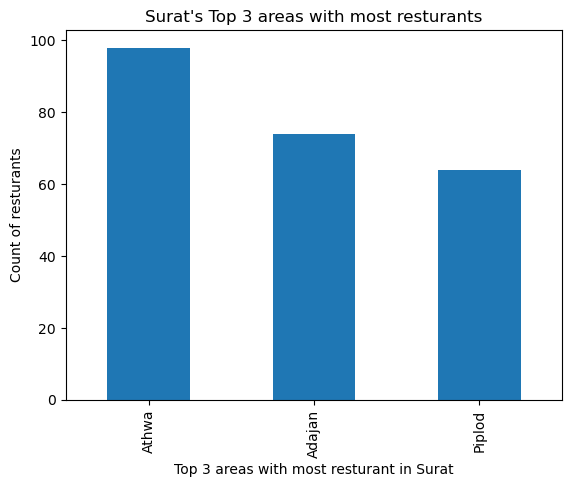

In [25]:
plt.title("Surat's Top 3 areas with most resturants")
Surat_top_3_AREAS.plot.bar()
plt.xlabel("Top 3 areas with most resturant in Surat")
plt.ylabel("Count of resturants")

### The most visted resturants of the top 3 areas

In [26]:
Most_visited_Surat= Surat_func_data.most_visited_resturants_in_city()
Most_visited_Surat

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
1412,76475,Adajan,Surat,Jakaas Chinese Food,300,4.3,1000,Chinese,Nr Mahalaxmi Temple,38
2379,219974,Adajan,Surat,Live Egg Station,300,4.1,1000,"North-Indian,Snacks,Beverages,Biryani,Fast-Foo...",Nr Pal Rto,52
3131,310702,Piplod,Surat,Meals101,250,4.1,500,"Combo,Chinese,Indian,North-Indian,Biryani,Beve...",Udhna,56
4850,401459,Athwa,Surat,Radhe Dhokla,200,4.4,500,"Punjabi,Gujarati,Thalis,North-Indian,Snacks,Fa...",Athwa,29
7156,70056,Athwa,Surat,Mahesh Pav Bhaji,300,4.0,500,"Fast-Food,Street Food,Chinese,South Indian,Piz...",Chowpaty,34
7225,77744,Athwa,Surat,Famous Frankie,200,4.1,500,Fast-Food,Parle Point,45
7672,177234,Adajan,Surat,Trishiv Chinese Corner,200,4.1,500,"Chinese,Fast-Food,Street Food,Pan-Asian,Asian",Anand Mahal Road,44
8092,347621,Athwa,Surat,La Pino'Z Pizza,300,4.3,500,"Pizzas,Italian,Snacks,Desserts,Beverages",Parle Point,46
8246,395439,Adajan,Surat,Shree Kathiyawadi Khadki,250,4.3,1000,"Gujarati,Thalis,North-Indian,Rajasthani,Desser...",Adajan,46


### Resturants of top 3 places in Surat having average rating of 4.5 or greater

In [27]:
Surat_top_resturants= Surat_func_data.top_resturants_avg_rating()
Surat_top_resturants

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
1741,120638,Adajan,Surat,Sobis Diet Farm,400,4.8,50,Fast-Food,Adajan Gam,52
2496,236435,Piplod,Surat,Starbucks Coffee,400,4.5,50,"Beverages,Bakery",Dumas Road,53
2654,253978,Adajan,Surat,Slurrp,250,4.5,100,"Healthy Food,Juices,Beverages,Seafood,Biryani,...",Anand Mahal Road,48
2682,256853,Adajan,Surat,Twisted Cake,270,4.6,20,"Desserts,Sweets",Adajan,59
4281,376616,Piplod,Surat,Sizzling Salsa,400,4.5,20,"Mexican,Continental,Italian",Piplod,56
4592,389388,Adajan,Surat,Kudrati Kahumbo,200,4.8,50,Beverages,Adajan,38
4770,397918,Piplod,Surat,Binayak Fast Food,200,4.5,50,Fast-Food,Piplod,58
7091,64770,Athwa,Surat,The Belgian Waffle Co.,270,4.5,100,"Desserts,Beverages",Ghod Dod Road,38
7117,66083,Athwa,Surat,Surtea,200,4.5,100,Fast-Food,Anmol Complex Athwalines,44
7215,76890,Adajan,Surat,Kshitij Restaurant,350,4.5,100,"North-Indian,Punjabi,Rajasthani,Gujarati,Thali...",B/S Ny Pizza,39


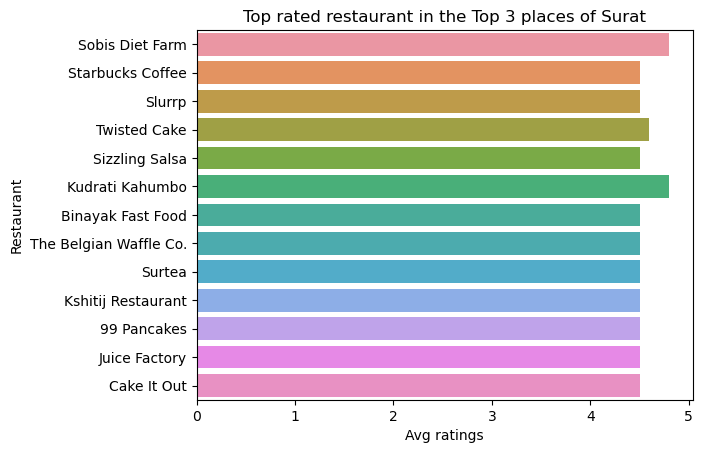

In [28]:
plt.title("Top rated restaurant in the Top 3 places of Surat")
price_top_rated= sns.barplot(Surat_top_resturants, y= Surat_top_resturants["Restaurant"], x=Surat_top_resturants["Avg ratings"],orient='h')

Analysis about Surat :-

In the city **Surat** there are a total of 511 restaurants in 79 different areas of the city. Out of these 511 restaurants the top 3 areas having the most restaurants are **Athwa** with 98 restaurants, **Adajan** with 74 restaurants and **Piplod** with 64 restaurants covering around 46.18% of the total restaurants in the city.
    Out of the 236 restaurants from the Top 3 areas of the city, only a total of 13 restaurants are having an average rating of 4.5 and above through which it can be assume that the food and the quality of these restaurants are very good. Moreover, we can also see that only 9 restaurants are most visited in these areas. 
s. 
4.

Conclusion:- 

1> From the "Total ratings" we can assume that some of resturants from those 13 resturants gets less orders even when they are well rated. This could be due to less advertizements of these resturants OR could be due to less offeres in these resturants. We can advice these resturants to generate offers twice or thrice in a month for the customers. This might give a boost to their business as customers might start ordering seeing the offers of the resturants and could experience the resturants foods and quality.

2>  For Swiggy, since Athwa, Adajan and Piplod are the top 3 places with most resturants, we can deploy more Delivery Agents in these areas of the city so that they could handle more number of orders coming from these areas. After doing so, when the customers notices that the orders from these areas are being delivered quickly, they will make most of the orders from these areas through Swiggy which will give Swiggy a good business.

3> For Swiggy, since Athwa, Adajan and Piplod are the top 3 places with most resturants, we can generate more offers for the customers ordering from these resturants. This will give a boost to the sales of these resturants through Swiggy and doing this the Swiggy Delivery Agent and Swiggy can earn good commission.5.

### Bengaluru

In [29]:
Bangalore_data= grouping_cities.get_group("Bangalore")
Bangalore_data

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,300,4.4,100,"Biryani,Chinese,North-Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650,4.4,100,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250,3.9,500,"North-Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350,4.0,50,"Rajasthani,Gujarati,North-Indian,Snacks,Desser...",80 Feet Road,63
...,...,...,...,...,...,...,...,...,...,...
8626,455120,Majestic,Bangalore,Mejestic Cafe,250,2.9,80,"South Indian,Indian,Chinese,Beverages",Majestic,51
8647,457452,Sanjay Nagar New Bel Road,Bangalore,Sri Ramji Sweets,75,2.9,80,Sweets,Sanjay Nagar New Bel Road,51
8648,457630,Jayanagar,Bangalore,Sri Sai Foods,149,2.9,80,South Indian,Jayanagar,56
8664,461164,Majestic,Bangalore,Himadri Ice Cream,250,2.9,80,"Ice Cream,Beverages,Desserts",Majestic,40


In [30]:
Bangalore_data.describe()

,ID,Price,Avg ratings,Total ratings,Delivery time
count,946.000000,946.000000,946.000000,946.000000,946.000000
mean,241181.195560,382.524313,3.762896,148.520085,50.529598
std,157812.549078,268.195905,0.650883,220.852912,9.164440
min,211.000000,15.000000,2.500000,20.000000,28.000000
25%,65216.750000,200.000000,2.900000,50.000000,45.000000
50%,287008.500000,300.000000,4.100000,80.000000,52.000000
75%,392492.000000,450.000000,4.300000,100.000000,57.000000
max,462943.000000,2500.000000,5.000000,1000.000000,78.000000


In [31]:
Bangalore_func_data= City_Top_Areas(Bangalore_data)
Bangalore_func_data

In [32]:
count_of_unique_areas_of_Bangalore= Bangalore_func_data.count_of_unique_areas()
count_of_unique_areas_of_Bangalore

77

#### Top 3 areas of Bangalore

In [33]:
Bangalore_top_3_areas=Bangalore_func_data.top_3_areas()
Bangalore_top_3_areas

Area
Indiranagar    130
Koramangala    124
Ashok Nagar    113
Name: count, dtype: int64

<Axes: xlabel='Area'>

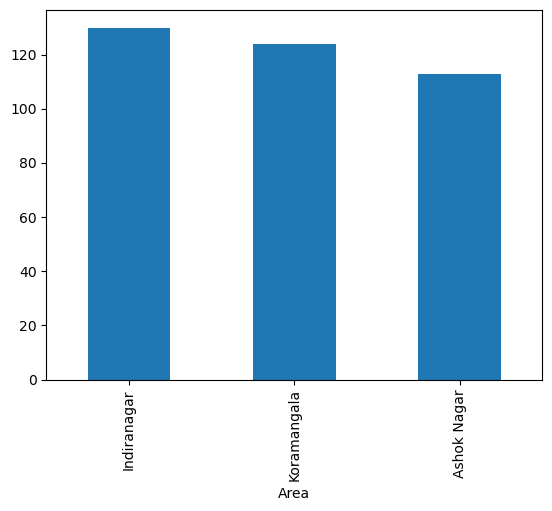

In [34]:
Bangalore_top_3_areas.plot.bar()

#### The most visited resturants of the top 3 areas

In [35]:
most_visited_Bangalore= Bangalore_func_data.most_visited_resturants_in_city()
most_visited_Bangalore

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250,3.9,500,"North-Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
6,258,Indiranagar,Bangalore,Chinita Real Mexican Food,1000,4.5,500,"Mexican,Beverages,Salads",Double Road,53
9,308,Koramangala,Bangalore,Bangaliana,300,4.0,500,Bengali,7Th Block,57
31,2008,Indiranagar,Bangalore,The Brekkie Shop - All Day Menu,200,4.3,500,"British,Italian,Indian,Chinese,South Indian,No...",1St Stage,57
75,3369,Ashok Nagar,Bangalore,Truffles,450,4.5,1000,"American,Desserts,Continental,Italian",St. Marks Road,29
77,3454,Koramangala,Bangalore,Lazeez,500,4.2,500,"North-Indian,Mughlai",5Th Block,55
125,5247,Ashok Nagar,Bangalore,Corner House Ice Cream,250,4.7,1000,"Ice Cream,Desserts",Residency Road,31
194,8241,Indiranagar,Bangalore,Paris Panini - French Street Food,450,4.4,1000,"French,Street Food",Hal 3Rd Stage,57
206,8766,Ashok Nagar,Bangalore,Beijing Bites,450,4.2,500,Chinese,Richmond Road,33
258,10238,Ashok Nagar,Bangalore,Smoke House Deli,800,4.5,500,"European,Italian,American,Pastas,Salads,Juices...",Lavelle Road,39


### Resturants of top 3 places in Bangalore having average rating of 4.5 or greater

In [36]:
Bangalore_top_resturants= Bangalore_func_data.top_resturants_avg_rating()
Bangalore_top_resturants

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
5,254,Indiranagar,Bangalore,Treat,800,4.5,100,"Mughlai,North-Indian",100 Feet Road,56
6,258,Indiranagar,Bangalore,Chinita Real Mexican Food,1000,4.5,500,"Mexican,Beverages,Salads",Double Road,53
45,2811,Ashok Nagar,Bangalore,Art Of Delight,250,4.6,100,"Ice Cream,Desserts,Beverages",Residency Road,34
75,3369,Ashok Nagar,Bangalore,Truffles,450,4.5,1000,"American,Desserts,Continental,Italian",St. Marks Road,29
125,5247,Ashok Nagar,Bangalore,Corner House Ice Cream,250,4.7,1000,"Ice Cream,Desserts",Residency Road,31
258,10238,Ashok Nagar,Bangalore,Smoke House Deli,800,4.5,500,"European,Italian,American,Pastas,Salads,Juices...",Lavelle Road,39
612,25222,Koramangala,Bangalore,China Pearl,1100,4.5,1000,"Chinese,Asian",6Th Block,64
777,33253,Ashok Nagar,Bangalore,Happy Belly Bakes- Cakes And Desserts,350,4.7,100,"Desserts,Bakery,Beverages",Primrose Road,37
1137,53503,Ashok Nagar,Bangalore,Brik Oven,1000,4.5,100,"Pizzas,Italian,Desserts,Beverages",Church Street,35
1176,56233,Koramangala,Bangalore,Khawa Karpo,178,4.6,100,Chinese,Koramangala,53


In [37]:
#plt.title("Top rated restaurant in the Top 3 places of Bangalore")
#price_top_rated= sns.barplot(Bangalore_top_resturants, y= Bangalore_top_resturants["Restaurant"], x=Bangalore_top_resturants["Avg ratings"],orient='h')

Analysis about Bangalore :-

In the city ** Bangalore ** there are a total of 946 restaurants in 77 different areas of the city. Out of these 946 restaurants the top 3 areas having the most restaurants are **Indiranagar** with 130 restaurants, **Koramangala** with 124 restaurants and **Ashok Nagar** with 113 restaurants covering around 38.79% of the total restaurants in the city.
    Out of the 367 restaurants from the Top 3 areas of the city, only a total of 50 restaurants are having an average rating of 4.5 and above through which it can be assume that the food and the quality of these restaurants are very good. Moreover, we can also see that only 51 restaurants are most visited in these areas. 
s. 
s.


Conclusion:- 

1>  From the "Total ratings" we can assume that some of resturants from those 50 resturants gets less orders even when they are well rated. This could be due to less advertizements of these resturants OR could be due to less offeres in these resturants. We can advice these resturants to generate offers twice or thrice in a month since their Price is high for the customers. This might give a boost to their business as customers might start ordering seeing the offers of the resturants and could experience the resturants foods and quality.

2>  For Swiggy, since Indiranagar, Koramangala and Ashok Naga are the top 3 places with most resturants, we can deploy more Delivery Agents in these areas of the city so that they could handle more number of orders coming from these areas. After doing so, when the customers notices that the orders from these areas are being delivered quickly, they will make most of the orders from these areas through Swiggy which will give Swiggy a good business.

3> For Swiggy, since Indiranagar, Koramangala and Ashok Naga are the top 3 places with most resturants, we can generate more offers for the customers ordering from these resturants. This will give a boost to the sales of these resturants through Swiggy and doing this the Swiggy Delivery Agent and Swiggy can earn good commission.5.

### Chennai

In [38]:
Chennai_data= grouping_cities.get_group("Chennai")
Chennai_data.head(5)

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
155,6345,Teynampet,Chennai,Amaravathi,650,4.2,100,"Indian,Chinese,Andhra,Tandoor",Cathedral Road,53
156,6358,Nandanam,Chennai,Eatalica,500,4.5,100,"Italian,American",Ra Puram,69
179,7776,Gopalapuram,Chennai,The Kati Roll Shop,250,4.3,1000,Street Food,Cathedral Road,52
181,7826,Alwarpet,Chennai,Benjarong,1500,4.6,100,Thai,Ttk Road,68
182,7828,Mylapore,Chennai,Kaaraikudi,500,3.6,100,Chettinad,Dr Radhakrishnan Salai,57


In [39]:
Chennai_data.describe()

,ID,Price,Avg ratings,Total ratings,Delivery time
count,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000
mean,233910.519492,357.214869,3.778694,161.940163,58.950136
std,157264.401218,262.274022,0.643006,281.550426,12.901915
min,6345.000000,10.000000,2.700000,20.000000,27.000000
25%,59552.500000,200.000000,2.900000,50.000000,50.000000
50%,259101.000000,300.000000,4.100000,80.000000,59.000000
75%,378469.500000,400.000000,4.300000,100.000000,69.000000
max,465523.000000,2500.000000,5.000000,5000.000000,94.000000


In [40]:
Chennai_func_data= City_Top_Areas(Chennai_data)
Chennai_func_data

In [41]:
count_of_unique_areas_of_Chennai= Chennai_func_data.count_of_unique_areas()
count_of_unique_areas_of_Chennai

79

### Top 3 areas with most resturants in Chennai

In [42]:
Chennai_top_3_AREAS= Chennai_func_data.top_3_areas()
Chennai_top_3_AREAS

Area
Perambur      89
Anna Nagar    73
Kilpauk       58
Name: count, dtype: int64

Text(0, 0.5, 'Count of resturants')

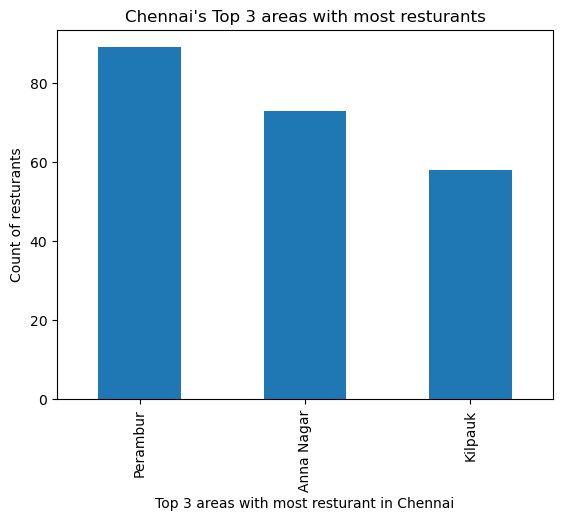

In [43]:
plt.title("Chennai's Top 3 areas with most resturants")
Chennai_top_3_AREAS.plot.bar()
plt.xlabel("Top 3 areas with most resturant in Chennai")
plt.ylabel("Count of resturants")

### The most visited resturants of the top 3 areas

In [44]:
Most_visited_Chennai= Chennai_func_data.most_visited_resturants_in_city()
Most_visited_Chennai

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
259,10275,Anna Nagar,Chennai,Kim Ling,800,4.4,500,Chinese,Teja Tower,64
294,11316,Anna Nagar,Chennai,Mainland China,850,4.3,500,"Chinese,Oriental,Thai,Pan-Asian,Seafood,Asian,...",5Th Avenue,72
462,19000,Anna Nagar,Chennai,Cafe Arabica,700,4.4,500,"Italian,Continental,Arabian,Bakery",Anna Nagarr,60
719,30791,Perambur,Chennai,Tasty Kitchen,300,4.2,1000,"Biryani,South Indian,Chinese,Fast-Food,North-I...",Kolathur,62
841,37067,Kilpauk,Chennai,Subway,350,4.4,1000,"Fast-Food,Salads,Snacks,Desserts,Beverages",Kilpauk,48
907,39583,Perambur,Chennai,Grill & Barbeque,300,4.0,500,"Chinese,Fast-Food,Grill,North-Indian",Perambur,64
1260,62679,Anna Nagar,Chennai,Ambur Star Briyani,500,4.3,1000,Biryani,Near Tower Park,58
1396,73720,Kilpauk,Chennai,Hotel Paramount,500,4.3,1000,"North-Indian,South Indian,Chinese,Seafood,Biryani",Kilpauk,39
1566,92403,Kilpauk,Chennai,Juice Junction,150,4.6,500,"Juices,Beverages",Kilpauk Garden,54
1690,111360,Perambur,Chennai,Dharani Home Mades,200,4.1,500,"Snacks,Fast-Food",M H Road South,48


#### Resturants of top 3 places in Chennai having average rating of 4.5 or greater

In [45]:
Chennai_top_resturants= Chennai_func_data.top_resturants_avg_rating()
Chennai_top_resturants

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
481,19917,Anna Nagar,Chennai,Asian Station,1400,4.5,100,Asian,Croma Building,66
1566,92403,Kilpauk,Chennai,Juice Junction,150,4.6,500,"Juices,Beverages",Kilpauk Garden,54
1968,159913,Kilpauk,Chennai,Chai Kings,150,4.5,100,"Beverages,Snacks",Kilpauk,38
2264,200833,Anna Nagar,Chennai,Momo Sa-Khang By Kailash Kitchen,200,4.7,500,Chinese,Annanagar,52
3316,323040,Anna Nagar,Chennai,Ram'S Tea House,100,4.6,50,Beverages,Annanagar,69
3746,349522,Perambur,Chennai,Chennai Classic Cakes,250,4.6,20,"Bakery,Continental,Pizzas",Perambur,58
3783,352355,Kilpauk,Chennai,Pastry Maniaa,200,4.7,100,"Desserts,Pizzas,Pastas,Continental,Bakery",Annanagar,59
4012,364331,Anna Nagar,Chennai,The Living Room,1200,4.5,50,"South Indian,North-Indian,Tandoor,Mediterranea...",Annanagar,68
4096,369125,Perambur,Chennai,Metro Cakes,300,4.5,20,Desserts,Kolathur,68
4262,376161,Anna Nagar,Chennai,Chinese Wox,300,4.6,100,Chinese,Annanagar,68


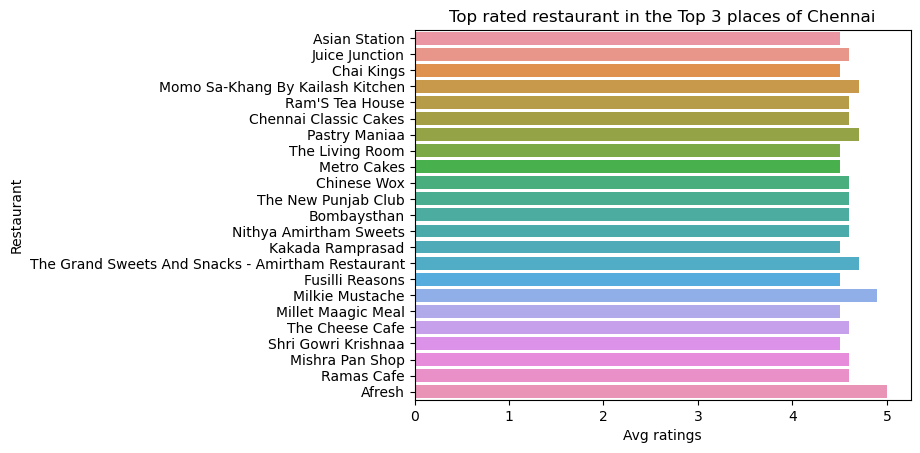

In [46]:
plt.title("Top rated restaurant in the Top 3 places of Chennai")
price_top_rated= sns.barplot(Chennai_top_resturants, y= Chennai_top_resturants["Restaurant"], x=Chennai_top_resturants["Avg ratings"],orient='h')

Analysis about Chennai :-

In the city **Chennai** there are a total of 1103 restaurants in 79 different areas of the city. Out of these 1103 restaurants the top 3 areas having the most restaurants are **Perambur** with 89 restaurants, **Anna Nagar** with 73 restaurants and **Kilpauk** with 58 restaurants covering around 19.94% of the total restaurants in the city.
    Out of the 220 restaurants from the Top 3 areas of the city, only a total of 23 restaurants are having an average rating of 4.5 and above through which it can be assume that the food and the quality of these restaurants are very good. Moreover, we can also see that only 28 restaurants are most visited in these areas. 
. 


## Delhi

In [47]:
Delhi_data= grouping_cities.get_group("Delhi")
Delhi_data.head(5)

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
123,5208,Paschim Vihar,Delhi,Deli 63,400,2.9,80,"Street Food,Fast-Food",Punjabi Bagh,60
151,6075,Paschim Vihar,Delhi,London Grill Co,500,4.0,1000,"American,Healthy Food,Fast-Food,Continental,Sa...",Paschim Vihar,50
176,7626,Vishnu Garden,Delhi,Sethi Restaurant,300,4.0,1000,North-Indian,Pacific Mall,63
183,7859,Central Markt Punjabi Bagh,Delhi,Wok In The Clouds,1500,4.5,50,"North-Indian,Chinese,Thai,Continental",Punjabi Bagh,72
191,8175,Paschim Vihar,Delhi,Chawla Kitchen,500,3.8,500,"Chinese,Mughlai,Indian,Snacks,Popular Brand St...",Punjabi Bagh,48


In [48]:
Delhi_data.describe()

,ID,Price,Avg ratings,Total ratings,Delivery time
count,611.000000,611.000000,611.000000,611.000000,611.000000
mean,260167.432079,333.301146,3.526350,133.256956,50.734861
std,157469.612092,187.659548,0.608904,270.561101,13.052294
min,5208.000000,20.000000,2.700000,20.000000,21.000000
25%,93116.000000,200.000000,2.900000,50.000000,40.000000
50%,322309.000000,300.000000,3.600000,80.000000,49.000000
75%,402853.000000,400.000000,4.100000,100.000000,59.500000
max,465990.000000,1650.000000,5.000000,5000.000000,79.000000


In [49]:
Delhi_func_data= City_Top_Areas(Delhi_data)
Delhi_func_data

In [50]:
count_of_unique_areas_of_Delhi= Delhi_func_data.count_of_unique_areas()
count_of_unique_areas_of_Delhi

81

### Top 3 areas with most resturants in Delhi

In [51]:
Delhi_top_3_AREAS= Delhi_func_data.top_3_areas()
Delhi_top_3_AREAS

Area
Rohini           257
Paschim Vihar     62
Pitam Pura        36
Name: count, dtype: int64

Text(0, 0.5, 'Count of resturants')

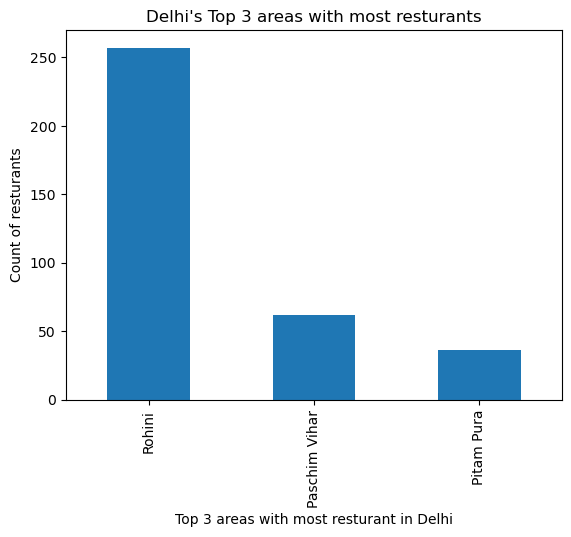

In [52]:
plt.title("Delhi's Top 3 areas with most resturants")
Delhi_top_3_AREAS.plot.bar()
plt.xlabel("Top 3 areas with most resturant in Delhi")
plt.ylabel("Count of resturants")

### The most visted resturants of the top 3 areas

In [53]:
Most_visited_Delhi= Delhi_func_data.most_visited_resturants_in_city()
Most_visited_Delhi

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
151,6075,Paschim Vihar,Delhi,London Grill Co,500,4.0,1000,"American,Healthy Food,Fast-Food,Continental,Sa...",Paschim Vihar,50
191,8175,Paschim Vihar,Delhi,Chawla Kitchen,500,3.8,500,"Chinese,Mughlai,Indian,Snacks,Popular Brand St...",Punjabi Bagh,48
256,10208,Rohini,Delhi,Burger King,350,4.3,1000,"American,Fast-Food",D Mall Twin District Center,35
363,15666,Rohini,Delhi,Behrouz Biryani,500,4.2,500,"Biryani,Mughlai,Lucknowi,Hyderabadi,Kebabs,Nor...",Sector 8,38
540,22127,Pitam Pura,Delhi,Kesar (Sainik Vihar),400,4.2,500,"North-Indian,Chinese,Fast-Food",Pitampura,40
548,22512,Pitam Pura,Delhi,Culinaria By Pikwik,200,4.2,500,"North-Indian,Continental,Home Food,Indian",Shakti Vihar,52
594,24162,Rohini,Delhi,Domino'S Pizza,400,4.3,500,Pizzas,Nn Mall Sector- 3,30
687,28961,Pitam Pura,Delhi,Gulab Wala,350,4.3,5000,"North-Indian,Desserts,South Indian,Street Food...",Pitampura,46
1537,89571,Rohini,Delhi,Ubq By Barbeque Nation,300,3.9,500,"North-Indian,Mughlai,Seafood,Biryani,Desserts,...",Rohini West Metro Station Complex,38
1954,156822,Paschim Vihar,Delhi,Sandoz Paschim Vihar,300,4.1,500,"North-Indian,Chinese",Punjabi Bagh,49


### Resturants of top 3 places in Delhi having average rating of 4.5 or greater

In [54]:
Delhi_top_resturants= Delhi_func_data.top_resturants_avg_rating()
Delhi_top_resturants

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
1016,46864,Rohini,Delhi,China Town Kathi Rolls,250,4.6,20,Fast-Food,Rohini,44
1878,142037,Rohini,Delhi,Pizza Paradise By Vhc,150,4.8,20,"Pizzas,Beverages,Italian,Continental,Biryani,D...",Chattarpur,44
3099,307466,Rohini,Delhi,Mosaic By Crowne Plaza Rohini,1000,4.6,20,"North-Indian,Bakery,Salads,Chinese,Juices,Dess...",Sector 10,48
3430,331641,Rohini,Delhi,Shake'N Food,350,4.7,20,Beverages,Rohini,46
4508,385841,Paschim Vihar,Delhi,Kakas Food Point,300,4.6,20,"Chinese,Fast-Food,North-Indian",Paschim Vihar,57
5322,422325,Rohini,Delhi,The Sugar Free Keto Kafe - By Artinci,200,4.8,20,"Healthy Food,Keto,Desserts,Ice Cream,Snacks,Be...",Rohini,46
6735,34387,Rohini,Delhi,Havmor Havfunn Ice Cream,200,4.6,100,"Ice Cream,Desserts",Prashant Vihar,38
7223,77567,Paschim Vihar,Delhi,Yamu'S Panchayat,400,4.5,50,"North-Indian,Desserts",Paschim Vihar,50
7270,84158,Paschim Vihar,Delhi,Lakhan Pan,100,4.6,50,Juices,Paschim Vihar,47
7820,233108,Rohini,Delhi,Vaishno Punjabi Dhaba,300,4.5,50,North-Indian,Sector-8,31


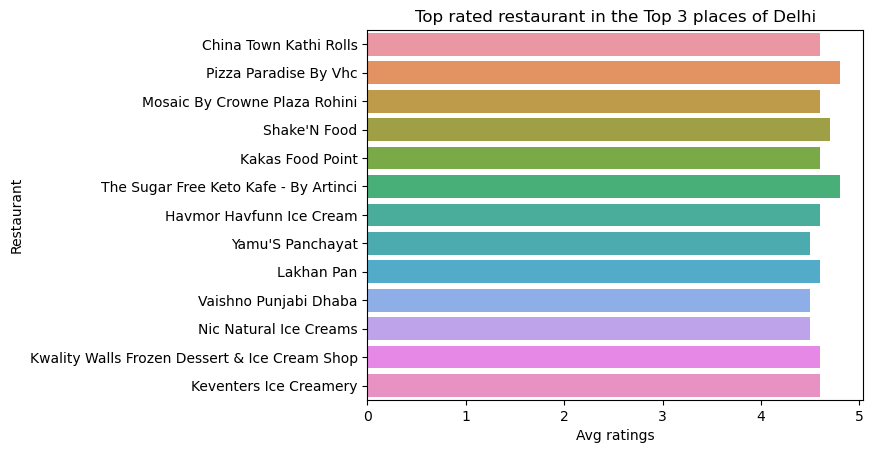

In [55]:
plt.title("Top rated restaurant in the Top 3 places of Delhi")
price_top_rated= sns.barplot(Delhi_top_resturants, y= Delhi_top_resturants["Restaurant"], x=Delhi_top_resturants["Avg ratings"],orient='h')

Analysis about Delhi :-

In the city **Delhi** there are a total of 611 restaurants in 81 different areas of the city. Out of these 611 restaurants the top 3 areas having the most restaurants are **Rohini** with 257 restaurants, **Paschim Vihar** with 62 restaurants and **Pitam Pura** with 36 restaurants covering around 58.10% of the total restaurants in the city.
    Out of the 355 restaurants from the Top 3 areas of the city, only a total of 13 restaurants are having an average rating of 4.5 and above through which it can be assume that the food and the quality of these restaurants are very good. Moreover, we can also see that only 18 restaurants are most visited in these areas. 


## Hyderabad

In [56]:
Hyderabad_data= grouping_cities.get_group("Hyderabad")
Hyderabad_data.head(5)

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
19,1299,Film Nagar,Hyderabad,So. The Sky Kitchen,800,2.9,80,"Mughlai,North-Indian,Chinese,Thai,Asian",Near Apollo Health City Gate,90
22,1547,Masab Tank,Hyderabad,Dine Hill,400,4.1,500,"Arabian,Biryani,North-Indian,Chinese",Ahmed Nagar,49
23,1590,Banjara Hills,Hyderabad,Sarvi Restaurant,400,4.1,5000,"Biryani,Tandoor,Chinese,Indian,Desserts,Kebabs...",Road 11,56
24,1593,Banjara Hills,Hyderabad,Sarvi Bakery,250,4.1,100,"Desserts,Fast-Food,Bakery",Opposite Care Hospital Road 11 Banjara Hills,58
27,1844,Punjagutta,Hyderabad,Chinese Pavilion,850,4.3,500,"Chinese,Seafood",Nagarjuna Circle,64


In [57]:
Hyderabad_data.describe()

,ID,Price,Avg ratings,Total ratings,Delivery time
count,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000
mean,252747.985089,300.481827,3.702889,307.651445,49.903075
std,162390.676699,194.465590,0.579485,878.490523,14.911553
min,1203.000000,40.000000,2.200000,20.000000,20.000000
25%,78172.000000,200.000000,2.900000,50.000000,37.000000
50%,305365.000000,250.000000,3.900000,80.000000,49.000000
75%,404272.000000,350.000000,4.200000,100.000000,63.000000
max,464989.000000,1700.000000,5.000000,10000.000000,92.000000


In [58]:
Hyderabad_func_data= City_Top_Areas(Hyderabad_data)
Hyderabad_func_data

In [59]:
count_of_unique_areas_of_Hyderabad= Hyderabad_func_data.count_of_unique_areas()
count_of_unique_areas_of_Hyderabad

151

### Top 3 areas with most resturants in Hyderabad

In [60]:
Hyderabad_top_3_AREAS= Hyderabad_func_data.top_3_areas()
Hyderabad_top_3_AREAS

Area
Banjara Hills              113
Himayath Nagar              92
Kothapet & Dilsukhnagar     65
Name: count, dtype: int64

Text(0, 0.5, 'Count of resturants')

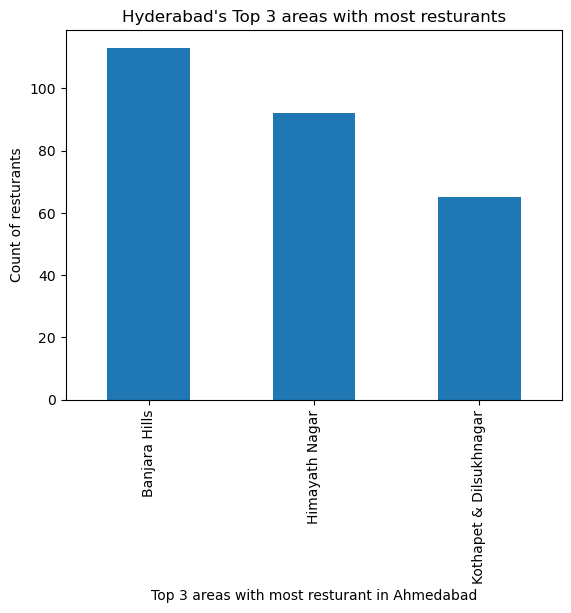

In [61]:
plt.title("Hyderabad's Top 3 areas with most resturants")
Hyderabad_top_3_AREAS.plot.bar()
plt.xlabel("Top 3 areas with most resturant in Ahmedabad")
plt.ylabel("Count of resturants")

### The most visited resturants of the top 3 areas

In [62]:
Most_visited_Hyderabad= Hyderabad_func_data.most_visited_resturants_in_city()
Most_visited_Hyderabad

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
23,1590,Banjara Hills,Hyderabad,Sarvi Restaurant,400,4.1,5000,"Biryani,Tandoor,Chinese,Indian,Desserts,Kebabs...",Road 11,56
79,3549,Banjara Hills,Hyderabad,Keshav Reddy Sweets,150,4.2,500,"Sweets,Bakery,Desserts,Fast-Food,Street Food,C...",Road No 2,65
291,11092,Banjara Hills,Hyderabad,Karachi Bakery Banjara,200,4.1,1000,"Bakery,Pizzas,Snacks,Chinese,Italian,American,...",Road No 1,56
329,13552,Banjara Hills,Hyderabad,Shadab Go,500,4.1,1000,"North-Indian,Biryani,Chinese",Road No 3,68
384,16394,Banjara Hills,Hyderabad,Exotica,1000,4.5,500,"Indian,Chinese,North-Indian,Punjabi,Tandoor,Ke...",Nbt Nagar,65
552,22743,Banjara Hills,Hyderabad,Dunkin Donuts,250,4.3,500,"Desserts,Bakery,Beverages,Fast-Food,Combo",Road No.1,52
882,38678,Banjara Hills,Hyderabad,Royal Tiffin Centre,150,4.0,1000,Indian,Road No -3,66
1245,61315,Banjara Hills,Hyderabad,Chai Point,150,4.2,500,"Bakery,Combo,Beverages,Maharashtrian,Snacks,St...",Gvk Mall,57
1305,65483,Himayath Nagar,Hyderabad,Istah - Shawarma And Biryani,250,4.4,1000,"Arabian,Lebanese,Mediterranean,Biryani",Himayath Nagar,27
1413,76601,Banjara Hills,Hyderabad,Skypark Cafe,500,4.0,500,"Cafe,Chinese,Continental",Road No 12,61


### Resturants of top 3 places in Hyderabad having average rating of 4.5 or greater

In [63]:
Hyderabad_top_resturants= Hyderabad_func_data.top_resturants_avg_rating()
Hyderabad_top_resturants

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
384,16394,Banjara Hills,Hyderabad,Exotica,1000,4.5,500,"Indian,Chinese,North-Indian,Punjabi,Tandoor,Ke...",Nbt Nagar,65
2440,228215,Banjara Hills,Hyderabad,Cafe Niloufer Premium Lounge,200,4.5,1000,"Bakery,Fast-Food,Snacks,Beverages",Banjara Hills,63
4364,379796,Kothapet & Dilsukhnagar,Hyderabad,Five Star And Koli Hut,120,4.7,20,Indian,Kothapet & Dilsukhnagar,54
4802,399267,Himayath Nagar,Hyderabad,Swiss Castle,500,4.6,100,"Bakery,Sweets,Desserts",Himayath Nagar,28
5798,441870,Himayath Nagar,Hyderabad,Wallonia Waffle Co.,300,5.0,20,Desserts,Himayath Nagar,45
5799,442021,Himayath Nagar,Hyderabad,Splurge - Thickshakes And Milkshakes,300,5.0,20,"Desserts,Ice Cream,Beverages",Himayath Nagar,45
5800,442023,Himayath Nagar,Hyderabad,The Liege Waffles,300,5.0,20,"Desserts,Bakery",Himayath Nagar,45
5831,442889,Himayath Nagar,Hyderabad,The Dessert Bakers,200,4.5,20,"Bakery,Desserts,Snacks",Himayath Nagar,35
5865,443815,Kothapet & Dilsukhnagar,Hyderabad,Habibi Hungry,200,4.6,50,"Arabian,Fast-Food",Kothapet & Dilsukhnagar,40
6033,448909,Himayath Nagar,Hyderabad,Zorro - Milkshakes And Thickshakes,300,5.0,20,Beverages,Himayath Nagar,46


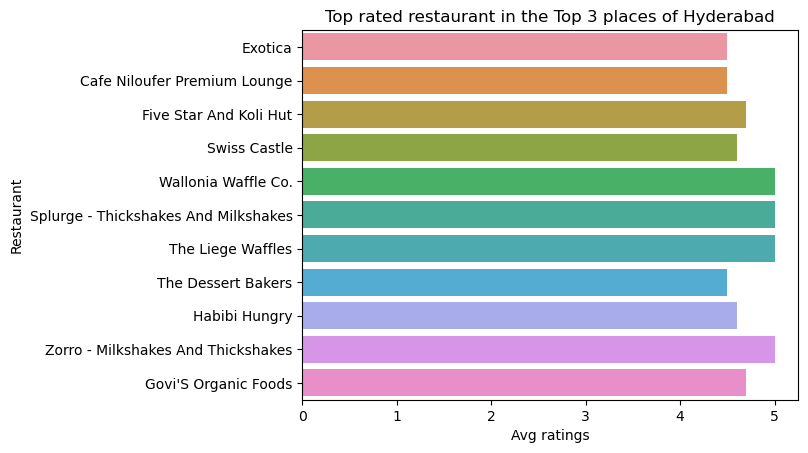

In [64]:
plt.title("Top rated restaurant in the Top 3 places of Hyderabad")
price_top_rated= sns.barplot(Hyderabad_top_resturants, y= Hyderabad_top_resturants["Restaurant"], x=Hyderabad_top_resturants["Avg ratings"],orient='h')

Analysis about Hyderabad :-

In the city **Hyderabad** there are a total of 1073 restaurants in 151 different areas of the city. Out of these 1073 restaurants the top 3 areas having the most restaurants are **Banjara Hills** with 113 restaurants, **Himayath Nagar** with 92 restaurants and **Kothapet & Dilsukhnagar** with 65 restaurants covering around 25.16% of the total restaurants in the city.
    Out of the 270 restaurants from the Top 3 areas of the city, only a total of 11 restaurants are having an average rating of 4.5 and above through which it can be assume that the food and the quality of these restaurants are very good. Moreover, we can also see that only 35 restaurants are most visited in these areas. 
. 


## Kolkata

In [65]:
Kolkata_data= grouping_cities.get_group("Kolkata")
Kolkata_data.head(5)

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
56,3007,Bhowanipore,Kolkata,Tandoori Darbar,500,4.4,100,"North-Indian,Chinese,Tandoor,Biryani,Beverages...",Hazra Road,71
57,3010,Ballygunge,Kolkata,Ballygunge Dhaba,500,4.3,500,"North-Indian,Biryani,Chinese",Ballygunge,59
58,3018,Gariahat,Kolkata,Tero Parbon,500,4.3,100,Bengali,Purna Das Road Hindustan Park,72
59,3020,Ballygunge,Kolkata,Wise Owl The Coffee Shop,700,4.3,100,"Continental,American,Cafe",Purnadas Road,76
60,3022,Gariahat,Kolkata,Aminia Restaurant- Golpark,500,4.3,1000,"Biryani,Mughlai,North-Indian,Indian,Kebabs,Tan...",Ballygunge Gardens,67


In [66]:
Kolkata_data.describe()

,ID,Price,Avg ratings,Total ratings,Delivery time
count,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000
mean,250647.192422,362.294205,3.698811,163.298663,67.809807
std,159216.075184,241.010804,0.660336,350.113050,14.177298
min,3007.000000,10.000000,2.300000,20.000000,31.000000
25%,70683.500000,200.000000,2.900000,50.000000,58.000000
50%,306382.000000,300.000000,3.900000,80.000000,69.000000
75%,391435.250000,400.000000,4.300000,100.000000,78.000000
max,466240.000000,1600.000000,5.000000,5000.000000,109.000000


In [67]:
Kolkata_func_data= City_Top_Areas(Kolkata_data)
Kolkata_func_data

In [68]:
count_of_unique_areas_of_Kolkata= Kolkata_func_data.count_of_unique_areas()
count_of_unique_areas_of_Kolkata

136

### Top 3 areas with most resturants in Kolkata

In [69]:
Kolkata_top_3_AREAS= Kolkata_func_data.top_3_areas()
Kolkata_top_3_AREAS

Area
Bidhannagar    123
Salt Lake       73
Lake Town       69
Name: count, dtype: int64

Text(0, 0.5, 'Count of resturants')

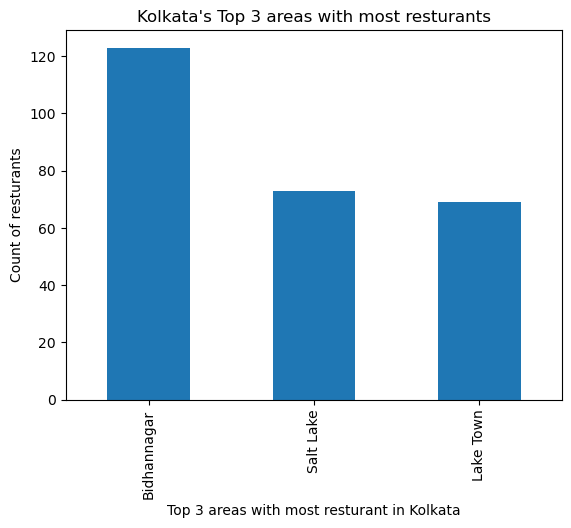

In [70]:
plt.title("Kolkata's Top 3 areas with most resturants")
Kolkata_top_3_AREAS.plot.bar()
plt.xlabel("Top 3 areas with most resturant in Kolkata")
plt.ylabel("Count of resturants")

### The most visited resturants of the top 3 areas

In [71]:
Most_visited_Kolkata= Kolkata_func_data.most_visited_resturants_in_city()
Most_visited_Kolkata

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
103,4599,Bidhannagar,Kolkata,Balle Balle Dhaba,500,4.1,1000,"North-Indian,Punjabi,Biryani",Sector 1,59
178,7689,Lake Town,Kolkata,Buddha Bites-Jessore Road,300,3.7,1000,"Chinese,Asian,Fast-Food,Snacks,Tibetan",Jessore Road,74
249,9984,Lake Town,Kolkata,Chennai Xpress,300,4.1,500,"South Indian,North-Indian,Chinese,Beverages",Near Hdfc Bank,74
346,15012,Lake Town,Kolkata,The Pind Punjabi Dhaba,500,4.3,500,"Punjabi,North-Indian,Tandoor,Biryani,Combo",Near Reiance Fresh,75
695,29425,Bidhannagar,Kolkata,Momo I Am,350,4.4,1000,"Asian,Chinese,Tibetan",Beides Kalyan Jewellery Cc1 Salt Lake,57
710,30163,Bidhannagar,Kolkata,Goutam'S - City Centre 1,250,4.1,500,"Chinese,Fast-Food,Beverages",Opp City Centre 1,61
730,31561,Bidhannagar,Kolkata,Mrs. Magpie,500,4.2,500,"Bakery,Continental",Near City Centre,50
1708,115093,Lake Town,Kolkata,Oudh 1590,1000,4.3,1000,"Biryani,Mughlai,North-Indian,Awadhi,Kebabs,Luc...",Kalindi,71
2176,188517,Lake Town,Kolkata,Kathi On The Go,300,3.9,1000,"Biryani,Indian,Kebabs,Mughlai,Fast-Food",Jessore Road,84
2523,239456,Bidhannagar,Kolkata,Kouzina Express,800,4.2,1000,"North-Indian,Chinese,Italian,Biryani,Healthy F...",Salt Lake,58


### Resturants of top 3 places in Kolkata having average rating of 4.5 or greater

In [72]:
Kolkata_top_resturants= Kolkata_func_data.top_resturants_avg_rating()
Kolkata_top_resturants

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
142,5802,Bidhannagar,Kolkata,First Innings - The Stadel Hotel,800,4.5,20,"North-Indian,Chinese,Continental",Sector 3,69
593,24087,Bidhannagar,Kolkata,Courting Coffees,300,4.6,50,Continental,Near Island Number 8,74
1056,48780,Bidhannagar,Kolkata,Xspicy - Indismart Hotel,300,4.7,20,"Indian,Chinese,Continental,Italian,Thai,South ...",Near Icici Bank Sec-V,89
2989,299656,Bidhannagar,Kolkata,Hatari,500,4.5,500,"Chinese,Indian",Salt Lake,73
3412,330575,Bidhannagar,Kolkata,Express By Ab'S,300,4.5,20,"Barbecue,Biryani,Indian,Thalis",Sector V Salt Lake,82
3475,334508,Bidhannagar,Kolkata,Dieto,200,4.5,20,Healthy Food,Salt Lake,65
3954,361360,Bidhannagar,Kolkata,The Samosa Lab,200,4.5,100,"Snacks,Beverages",Salt Lake,86
4353,379281,Salt Lake,Kolkata,Rita'S Cafe,300,4.5,20,"South Indian,Snacks,Beverages",Salt Lake,56
4912,404623,Lake Town,Kolkata,Shivohan Kitchen,150,4.6,20,"Fast-Food,Indian",Lake Town,88
5278,420277,Salt Lake,Kolkata,Qfc - Quality Fried Chicken,300,4.6,20,"Indian,American",Salt Lake,61


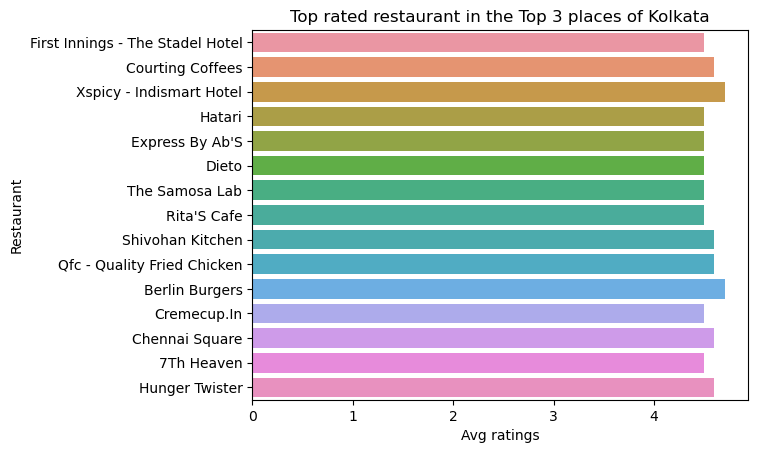

In [73]:
plt.title("Top rated restaurant in the Top 3 places of Kolkata")
price_top_rated= sns.barplot(Kolkata_top_resturants, y= Kolkata_top_resturants["Restaurant"], x=Kolkata_top_resturants["Avg ratings"],orient='h')

Analysis about Kolkata :-

In the city **Kolkata** there are a total of 1346 restaurants in 136 different areas of the city. Out of these 1346 restaurants the top 3 areas having the most restaurants are **Bidhannagar** with 123 restaurants, **Salt Lake** with 73 restaurants and **Lake Town** with 69 restaurants covering around 19.68% of the total restaurants in the city.
    Out of the 265 restaurants from the Top 3 areas of the city, only a total of 15 restaurants are having an average rating of 4.5 and above through which it can be assume that the food and the quality of these restaurants are very good. Moreover, we can also see that only 26 restaurants are most visited in these areas. 


### Mumbai

In [74]:
Mumbai_data= grouping_cities.get_group("Mumbai")
Mumbai_data.head(5)

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
25,1609,Andheri East,Mumbai,Kung Fu Panda,600,4.3,100,"Chinese,Thai,Asian",Marol,58
26,1617,Powai,Mumbai,Kosho,300,4.2,100,"Mughlai,North-Indian,Chinese,Seafood,Italian",Chandivali,56
30,1884,Powai,Mumbai,Hakka Express,300,4.0,100,"Chinese,Asian,Thai",Narayan Plaza,48
36,2312,Powai Area,Mumbai,The Punjabi'S Kitchen,500,4.4,500,North-Indian,Guru Hargobindji Marg Andheri East,65
55,2964,Andheri East,Mumbai,Sai Leela,500,4.2,20,"Mughlai,North-Indian,Chinese,Seafood",Andheri East,63


In [75]:
Mumbai_data.describe()

,ID,Price,Avg ratings,Total ratings,Delivery time
count,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000
mean,249259.202978,394.102665,3.598981,118.228840,48.309561
std,158160.175881,257.808443,0.661637,220.378279,8.144996
min,1609.000000,40.000000,2.700000,20.000000,24.000000
25%,77332.500000,250.000000,2.900000,50.000000,42.000000
50%,282388.000000,300.000000,3.800000,80.000000,49.000000
75%,392235.750000,500.000000,4.200000,100.000000,54.000000
max,466928.000000,2500.000000,5.000000,5000.000000,77.000000


In [76]:
Mumbai_func_data= City_Top_Areas(Mumbai_data)
Mumbai_func_data

In [77]:
count_of_unique_areas_of_Mumbai= Mumbai_func_data.count_of_unique_areas()
count_of_unique_areas_of_Mumbai

68

### Top 3 areas with most resturants in Mumbai

In [78]:
Mumbai_top_3_AREAS= Mumbai_func_data.top_3_areas()
Mumbai_top_3_AREAS

Area
Chembur         207
Andheri East    135
Kurla           129
Name: count, dtype: int64

Text(0, 0.5, 'Count of resturants')

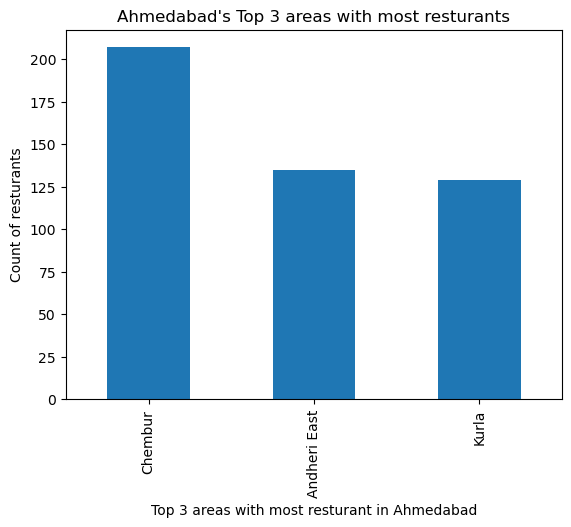

In [79]:
plt.title("Ahmedabad's Top 3 areas with most resturants")
Mumbai_top_3_AREAS.plot.bar()
plt.xlabel("Top 3 areas with most resturant in Ahmedabad")
plt.ylabel("Count of resturants")

### The most visited resturants of the top 3 areas

In [80]:
Most_visited_Mumbai= Mumbai_func_data.most_visited_resturants_in_city()
Most_visited_Mumbai

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
225,9317,Andheri East,Mumbai,Food Rush,550,4.0,500,"Mughlai,North-Indian,Chinese",Andheri East,52
304,11943,Chembur,Mumbai,Singh Saab,600,4.1,1000,"North-Indian,Chinese,Biryani,Punjabi,Desserts,...",Rc Marg,50
355,15287,Andheri East,Mumbai,Punjab Depot,249,3.9,1000,"North-Indian,Tandoor,Mughlai,Biryani,Snacks,De...",Marolsakinaka,48
471,19344,Kurla,Mumbai,Deluxe Restaurant,400,4.2,500,"Mughlai,Chinese",Kurla,33
498,20501,Chembur,Mumbai,Zaika,250,3.9,1000,"Mughlai,North-Indian,Chinese,Biryani",Chembur,51
532,21739,Chembur,Mumbai,Cafe Udipi,500,4.3,1000,"Street Food,North-Indian,Chinese,South Indian",Chembur,45
549,22581,Kurla,Mumbai,Kesas,300,3.8,500,"Arabian,Lebanese,Pastas,American,Biryani,North...",Tilak Nagar Chembur,35
734,31760,Chembur,Mumbai,Food Villa,300,4.2,500,"Bakery,Desserts",Nityanand Baug Road Chembur Colony Chembur,48
760,32775,Chembur,Mumbai,Pizza Caprina,600,4.0,500,"Pizzas,Fast-Food",Chembur,47
793,34020,Chembur,Mumbai,Indigo Grill,400,3.9,500,"North-Indian,Chinese,Mughlai,Biryani,Tandoor,C...",Chembur,44


### Resturants of top 3 places in Mumbai having average rating of 4.5 or greater

In [81]:
Mumbai_top_resturants= Mumbai_func_data.top_resturants_avg_rating()
Mumbai_top_resturants

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
522,21227,Chembur,Mumbai,Hotel Grand Central,1100,4.5,100,"North-Indian,Chinese,Seafood,Biryani,Asian",Chembur,48
958,42423,Andheri East,Mumbai,Ching Asia,600,4.5,20,Pan-Asian,Chakala,64
1547,90900,Andheri East,Mumbai,Afra Mughlai Darbar,450,4.5,50,"Indian,Chinese,Desserts,Juices",Marol,54
2117,179653,Kurla,Mumbai,Javed Bhai'S,300,4.5,20,Mughlai,Kurla Weight Bridge,38
2395,223311,Andheri East,Mumbai,Only Roti'S,250,4.6,50,Fast-Food,Pream Nagar Sakivihar Road,61
2673,255976,Chembur,Mumbai,Poetry By Love & Cheesecake,800,4.7,100,"Bakery,Continental,Salads,Pastas,European,Dess...",Chembur,54
2706,260216,Andheri East,Mumbai,Bokchoy Bowl,400,4.5,20,"Pan-Asian,Chinese,Asian,Thai,Malaysian,Tibetan",Opp Vasant Oasis Society Makhwana Road,57
3678,345886,Chembur,Mumbai,Noto - Healthy Ice Cream,190,4.5,100,Ice Cream,Chembur,44
3862,356173,Andheri East,Mumbai,Nosh & Beyond,1000,4.7,20,"Cafe,Italian,Pizzas,Fast-Food,Combo,Beverages,...",Marol Sakinaka,51
4007,363787,Kurla,Mumbai,Tata Q Quick Kitchen,400,4.7,100,"North-Indian,Snacks,Pastas,Fast-Food",Phoenix Mall,53


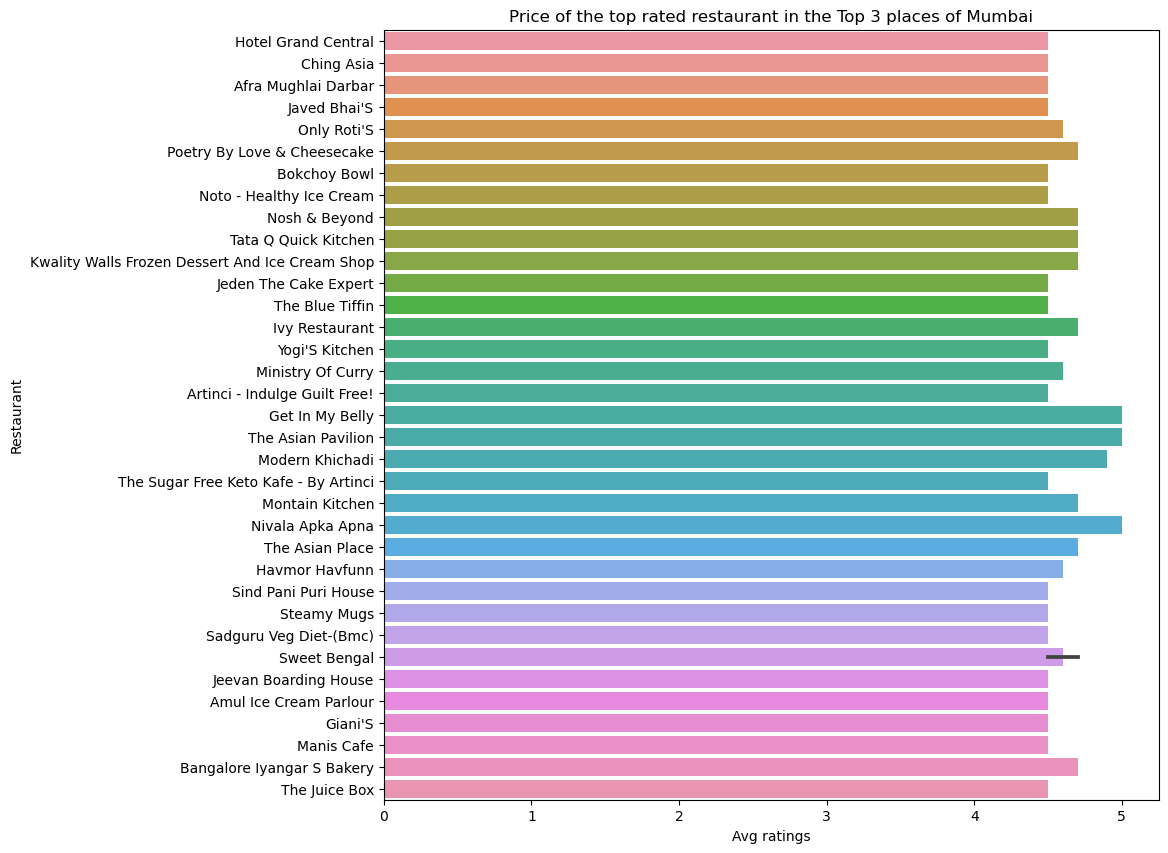

In [82]:
plt.figure(figsize=(10,10))
plt.title("Price of the top rated restaurant in the Top 3 places of Mumbai")
price_top_rated= sns.barplot(Mumbai_top_resturants, y= Mumbai_top_resturants["Restaurant"], x=Mumbai_top_resturants["Avg ratings"],orient='h')

Analysis about Mumbai :-

In the city **Mumbai** there are a total of 1276 restaurants in 68 different areas of the city. Out of these 1276 restaurants the top 3 areas having the most restaurants are **Chembur** with 207 restaurants, **Andheri East** with 135 restaurants and **Kurla** with 129 restaurants covering around 36.91% of the total restaurants in the city.
    Out of the 471 restaurants from the Top 3 areas of the city, only a total of 36 restaurants are having an average rating of 4.5 and above through which it can be assume that the food and the quality of these restaurants are very good. Moreover, we can also see that only 40 restaurants are most visited in these areas. 


### Pune

In [83]:
Pune_data= grouping_cities.get_group("Pune")
Pune_data.head(5)

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
32,2042,Aundh,Pune,Juice Destination,200,4.2,500,"Thalis,North-Indian,Punjabi,Beverages",Iti Road Aundh,60
33,2047,Aundh,Pune,Hyderabadi Spice,400,4.2,1000,"Biryani,Mughlai,North-Indian,Chinese",Parihar Chowk,58
34,2102,Aundh,Pune,Cafe Peterdonuts,400,4.1,50,"Continental,Desserts",Gaikwad Nagar,71
35,2250,Baner,Pune,Karolbaug,750,4.1,50,"Mughlai,North-Indian,Chinese,Biryani",Sakal Nagar,72
39,2516,Aundh,Pune,Taaareef,1100,4.4,100,"Mughlai,North-Indian,Seafood,Biryani",Iti Road,67


In [84]:
Pune_data.describe()

,ID,Price,Avg ratings,Total ratings,Delivery time
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,232912.273646,354.087236,3.550781,112.865014,55.869605
std,164211.701002,221.146928,0.666905,174.516826,14.189159
min,2042.000000,40.000000,2.000000,20.000000,26.000000
25%,57128.000000,200.000000,2.900000,50.000000,45.000000
50%,243625.000000,300.000000,3.500000,80.000000,56.000000
75%,395169.000000,400.000000,4.200000,100.000000,67.000000
max,466044.000000,2000.000000,5.000000,1000.000000,89.000000


In [85]:
Pune_func_data= City_Top_Areas(Pune_data)
Pune_func_data

In [86]:
count_of_unique_areas_of_Pune= Pune_func_data.count_of_unique_areas()
count_of_unique_areas_of_Pune

91

### Top 3 areas with most resturants in Pune

In [87]:
Pune_top_3_AREAS= Pune_func_data.top_3_areas()
Pune_top_3_AREAS

Area
Kothrud          149
Shivajinagar      72
Koregaon Park     69
Name: count, dtype: int64

Text(0, 0.5, 'Count of resturants')

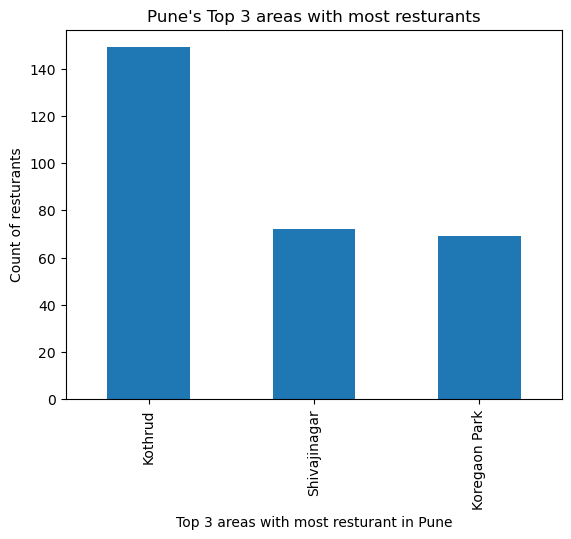

In [88]:
plt.title("Pune's Top 3 areas with most resturants")
Pune_top_3_AREAS.plot.bar()
plt.xlabel("Top 3 areas with most resturant in Pune")
plt.ylabel("Count of resturants")

### The most visted resturants of the top 3 areas

In [89]:
Most_visited_Pune= Pune_func_data.most_visited_resturants_in_city()
Most_visited_Pune

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
83,3855,Koregaon Park,Pune,Uncle'S Chinese,350,4.1,1000,"Chinese,Thai,Malaysian",Koregaon Park,55
434,18087,Kothrud,Pune,Golden Dragon,400,4.1,500,Chinese,Near Karve Putala,59
581,23719,Shivajinagar,Pune,Mcdonald'S,400,4.3,1000,"American,Fast-Food",Jm Road,34
659,27926,Kothrud,Pune,Hotel Durga,300,4.5,500,Fast-Food,Kothrud,45
826,36195,Kothrud,Pune,Barometer,1100,4.6,500,"Continental,Asian,Italian,North-Indian",Kothrud,57
922,40619,Kothrud,Pune,Kinara'S Maratha Darbar,350,4.1,1000,"Biryani,South Indian,North-Indian",Kothrud,58
960,42581,Shivajinagar,Pune,Burger King,350,4.2,1000,"American,Fast-Food",The Pavillion Mall,54
1236,60794,Kothrud,Pune,Green Food,300,4.3,1000,"North-Indian,South Indian,Chinese",Kothrud,50
1255,62408,Kothrud,Pune,Jayesh A1 Sandwiches,200,4.2,500,Fast-Food,Karve Nagar,51
1933,152984,Kothrud,Pune,Oye Kiddan,200,4.1,1000,"Punjabi,North-Indian,Desserts,Thalis,Combo",Kothrud Oye Kiddan,65


### Resturants of top 3 places in Pune having average rating of 4.5 or greater

In [90]:
Pune_top_resturants= Pune_func_data.top_resturants_avg_rating()
Pune_top_resturants

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
385,16448,Kothrud,Pune,Mirch Masala Resto Bar,800,4.5,100,"North-Indian,Chinese",Near Vandevi Mandir,63
628,25844,Koregaon Park,Pune,Sassy Teaspoon,800,4.6,100,"Ice Cream,Desserts,Bakery",Koregaon Park,47
659,27926,Kothrud,Pune,Hotel Durga,300,4.5,500,Fast-Food,Kothrud,45
768,33026,Koregaon Park,Pune,Buddha Paradise,250,4.6,50,"South Indian,Fast-Food,Chinese",Koregaon Park,49
826,36195,Kothrud,Pune,Barometer,1100,4.6,500,"Continental,Asian,Italian,North-Indian",Kothrud,57
1331,67618,Kothrud,Pune,Lean Life Bistro,300,4.7,20,Fast-Food,Kothrud,64
1387,72893,Kothrud,Pune,7Th Heaven Cake Shop,400,4.5,100,"Bakery,Desserts",Kothrud,51
1480,83041,Kothrud,Pune,Lassi Wassi,150,4.6,100,Beverages,Kothrud,58
1587,95365,Koregaon Park,Pune,Chafa Cafe And Studio,900,4.6,100,"Italian-American,Fast-Food,Continental",Kalyani,58
1781,127143,Koregaon Park,Pune,Yonies Pizza,550,4.6,20,"Pizzas,Italian",Koregaon Park,65


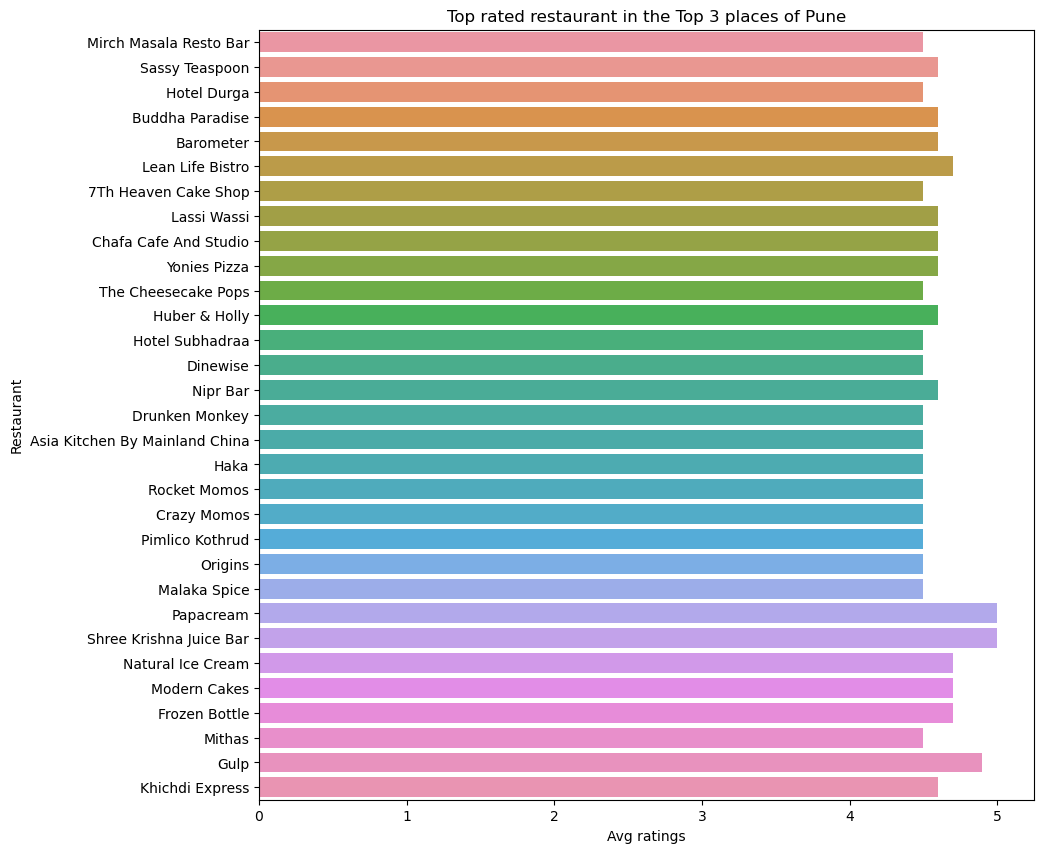

In [91]:
plt.figure(figsize=(10,10))
plt.title("Top rated restaurant in the Top 3 places of Pune")
price_top_rated= sns.barplot(Pune_top_resturants, y= Pune_top_resturants["Restaurant"], x=Pune_top_resturants["Avg ratings"],orient='h')

Analysis about Pune :-

In the city **Pune** there are a total of 1089 restaurants in 91 different areas of the city. Out of these 1089 restaurants the top 3 areas having the most restaurants are **Kothrud** with 149 restaurants, **ShivajiNagar** with 72 restaurants and **Koregaon Park** with 69 restaurants covering around 26.62% of the total restaurants in the city.
    Out of the 290 restaurants from the Top 3 areas of the city, only a total of 31 restaurants are having an average rating of 4.5 and above through which it can be assume that the food and the quality of these restaurants are very good. Moreover, we can also see that only 23 restaurants are most visited in these areas. 


# The most popular foodtype from different cities?

In [92]:
swiggy_cities_food = swiggy_data_edit_1[["ID", "Area", "City", "Food type"]]
swiggy_cities_food.head(6)

,ID,Area,City,Food type
0,211,Koramangala,Bangalore,"Biryani,Chinese,North-Indian,South Indian"
1,221,Koramangala,Bangalore,"Mughlai,Lucknowi"
2,246,Jogupalya,Bangalore,Chinese
3,248,Indiranagar,Bangalore,"North-Indian,Punjabi,Tandoor,Chinese"
4,249,Indiranagar,Bangalore,"Rajasthani,Gujarati,North-Indian,Snacks,Desser..."
5,254,Indiranagar,Bangalore,"Mughlai,North-Indian"


In [93]:
swiggy_cities_food.loc[:,'Food type'] = swiggy_cities_food['Food type'].str.split(',') ## This will create a list of all the items in the "Food type" columns so that we can use explode.

In [94]:
swiggy_cities_food.head(5)

,ID,Area,City,Food type
0,211,Koramangala,Bangalore,"[Biryani, Chinese, North-Indian, South Indian]"
1,221,Koramangala,Bangalore,"[Mughlai, Lucknowi]"
2,246,Jogupalya,Bangalore,[Chinese]
3,248,Indiranagar,Bangalore,"[North-Indian, Punjabi, Tandoor, Chinese]"
4,249,Indiranagar,Bangalore,"[Rajasthani, Gujarati, North-Indian, Snacks, D..."


**Explanation**

When using ***swiggy_cities_food['Food type'] = swiggy_cities_food['Food type'].str.split(',')***  we were trying to modify a view of the original DataFrame, not a copy. That is why it was showing an error as it might lead to unintended consequences because the changes might not be reflected in the original DataFrame.

1> swiggy_cities_food.loc[:, 'Food type']: The .loc[] indexer explicitly tells pandas you're modifying the entire column 'Food type' for all rows (:).

2> .str.split(','): This splits the string values in the Food type column into lists.

In [95]:
exploding_swiggy_cities_food=swiggy_cities_food.explode('Food type') ## It will transform the items inside the list into seperate ROWS and will duplicate the values of other columns.
exploding_swiggy_cities_food.head(5)

,ID,Area,City,Food type
0,211,Koramangala,Bangalore,Biryani
0,211,Koramangala,Bangalore,Chinese
0,211,Koramangala,Bangalore,North-Indian
0,211,Koramangala,Bangalore,South Indian
1,221,Koramangala,Bangalore,Mughlai


In [96]:
grouping_1_food_type=exploding_swiggy_cities_food.groupby(['City','Food type'])['Food type'].value_counts().reset_index(name='count_of_food_type')
grouping_1_food_type.head(6)

,City,Food type,count_of_food_type
0,Ahmedabad,Keventers & more,1
1,Ahmedabad,Afghani,3
2,Ahmedabad,American,19
3,Ahmedabad,Arabian,5
4,Ahmedabad,Asian,11
5,Ahmedabad,Bakery,35


In [97]:
grouping_2_food_type=grouping_1_food_type.sort_values(['City','count_of_food_type'],ascending=[True,False]) ## It will SORT the values first by "City" and then by "count"
grouping_2_food_type.head(5)

,City,Food type,count_of_food_type
29,Ahmedabad,Indian,205
20,Ahmedabad,Fast-Food,183
15,Ahmedabad,Chinese,179
8,Ahmedabad,Beverages,153
45,Ahmedabad,North-Indian,153


In [98]:
dropping_duplicate_grouping_2_food_type=grouping_2_food_type.drop_duplicates('City',keep='first') ## It will drop the duplicates of the "City" but will KEEP the FIRST ROW
dropping_duplicate_grouping_2_food_type

,City,Food type,count_of_food_type
29,Ahmedabad,Indian,205
88,Bangalore,Desserts,273
171,Chennai,Chinese,311
252,Delhi,Chinese,224
326,Hyderabad,Chinese,307
404,Kolkata,Chinese,541
481,Mumbai,Chinese,504
569,Pune,Chinese,335
648,Surat,Fast-Food,158


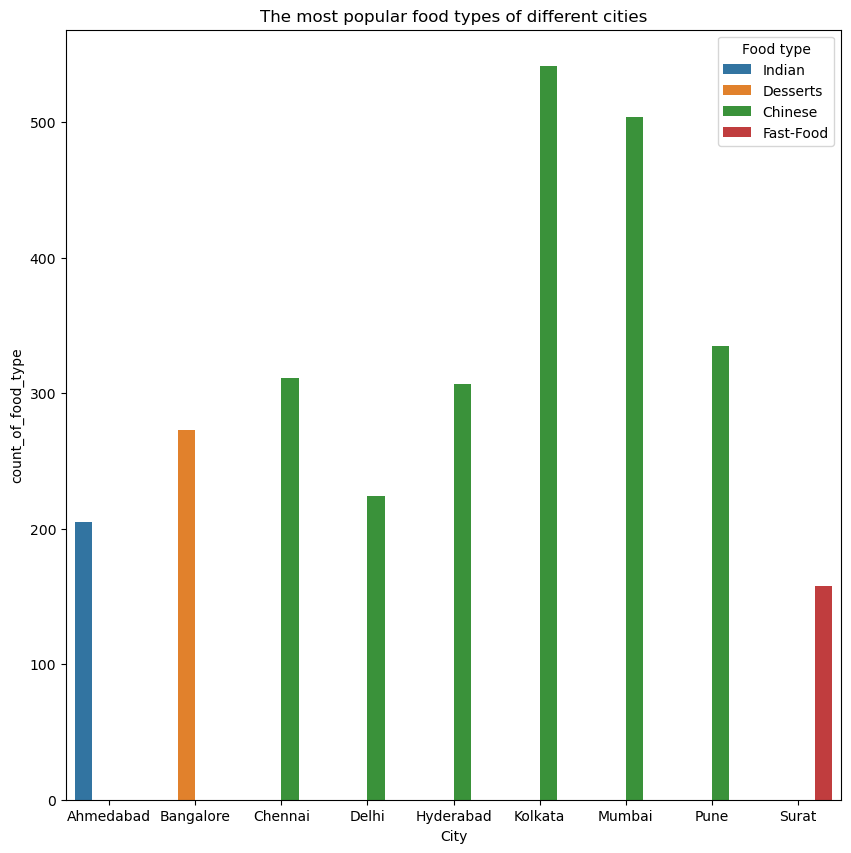

In [99]:
plt.figure(figsize=(10,10))
plt.title('The most popular food types of different cities')
food_graph=sns.barplot(data=dropping_duplicate_grouping_2_food_type, x=dropping_duplicate_grouping_2_food_type['City'],y=dropping_duplicate_grouping_2_food_type['count_of_food_type'], hue=dropping_duplicate_grouping_2_food_type['Food type'],width=0.8)

Analysis of the popular food type from different city:

The different food types famous in different cities of India are as follows:-

1> Ahmedabad--> In Ahmedabad the most famous food type is  Indian.

2> Bangalore--> In Bangalore the most famous food type is  Desserts.

3> Chennai--> In Chennai the most famous food type is Chinese.

4> Delhi--> In Delhi the most famous food type is Chinese.

5> Hyderabad--> In Hyderabad the most famous food type is Chinese.

6> Kolkata--> In Kolkata the most famous food type is Chinese.

7> Mumbai--> In Mumbai the most famous food type is Chinese.

8> Pune--> In Pune the most famous food type is Chinese.

9> Surat--> In Surat the most famous food type is Fast-Food

### Percentage of top rated resturants in different cities

In [100]:
total_Resturants_in_cities= swiggy_data_edit_1[['ID','City','Restaurant', 'Avg ratings']]
total_Resturants_in_cities.head(5)

,ID,City,Restaurant,Avg ratings
0,211,Bangalore,Tandoor Hut,4.4
1,221,Bangalore,Tunday Kababi,4.1
2,246,Bangalore,Kim Lee,4.4
3,248,Bangalore,New Punjabi Hotel,3.9
4,249,Bangalore,Nh8,4.0


In [101]:
grouping_total_dataset= total_Resturants_in_cities.groupby('City')['City'].value_counts() ##Grouping up the Total dataset with cities
grouping_total_dataset

City
Ahmedabad     713
Bangalore     946
Chennai      1103
Delhi         611
Hyderabad    1073
Kolkata      1346
Mumbai       1276
Pune         1089
Surat         511
Name: count, dtype: int64

In [102]:
resturant_equal_above_45= total_Resturants_in_cities[total_Resturants_in_cities['Avg ratings']>=4.5]
resturant_equal_above_45.head(3)

,ID,City,Restaurant,Avg ratings
5,254,Bangalore,Treat,4.5
6,258,Bangalore,Chinita Real Mexican Food,4.5
45,2811,Bangalore,Art Of Delight,4.6


In [103]:
grouping_cities_resturants= resturant_equal_above_45.groupby('City')['City'].value_counts() ## Grouping up the cities where the AVG Rating is >=4.5
grouping_cities_resturants

City
Ahmedabad     37
Bangalore     94
Chennai      120
Delhi         21
Hyderabad     44
Kolkata      127
Mumbai       103
Pune          82
Surat         34
Name: count, dtype: int64

In [104]:
top_resturant_percentage= (grouping_cities_resturants / grouping_total_dataset)*100
top_resturant_percentages= top_resturant_percentage.reset_index(name='perc')
top_resturant_percentages

,City,perc
0,Ahmedabad,5.189341
1,Bangalore,9.936575
2,Chennai,10.879420
3,Delhi,3.436989
4,Hyderabad,4.100652
5,Kolkata,9.435364
6,Mumbai,8.072100
7,Pune,7.529844
8,Surat,6.653620


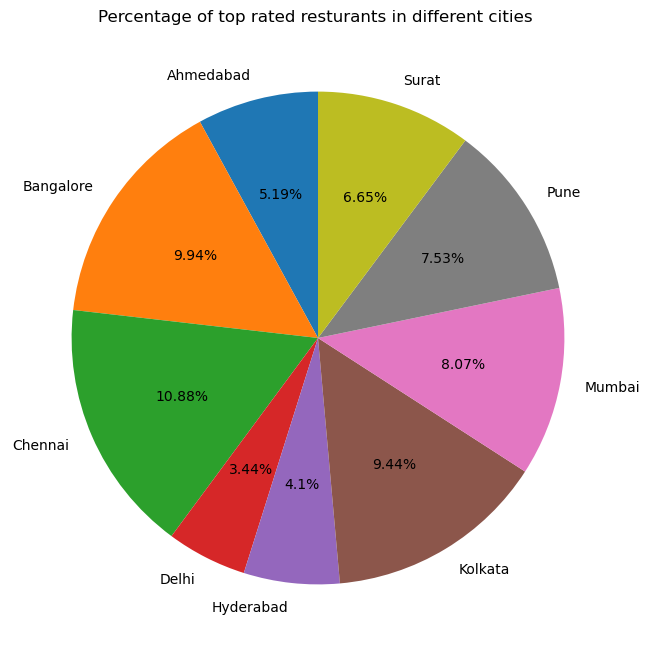

In [118]:
## Since the pie chart was automatically recalculating further percentages in the perc column by summing up the perc total values. Used CHATGPT to take the excat value from the column

sizes = top_resturant_percentages['perc']  # Exact percentage values
labels = top_resturant_percentages['City']

def autopct_exact(pct, allvals):
    absolute = np.round(pct * np.sum(allvals) / 100., 2)  # Get the absolute value
    return f"{absolute}%" 

plt.figure(figsize=(8,8))
plt.title('Percentage of top rated resturants in different cities ')
plt.pie(sizes, labels=labels, autopct=lambda pct: autopct_exact(pct, sizes), startangle=90, normalize=True)
plt.show()



### Distribute the resturants pricewise in different cities.

In [106]:
pricewise_resturants=swiggy_data_edit_1
pricewise_resturants.head(5)

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,300,4.4,100,"Biryani,Chinese,North-Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650,4.4,100,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250,3.9,500,"North-Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350,4.0,50,"Rajasthani,Gujarati,North-Indian,Snacks,Desser...",80 Feet Road,63


In [107]:
pricewise_resturants['Price_Range']= ["High-Price-Range" if i >= 600 and i <= 2500 else "Medium-Price-Range" if i >= 300 and i < 600 else "Low-Price-Range" for i in pricewise_resturants['Price']]
pricewise_resturants.head(60)

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time,Price_Range
0,211,Koramangala,Bangalore,Tandoor Hut,300,4.4,100,"Biryani,Chinese,North-Indian,South Indian",5Th Block,59,Medium-Price-Range
1,221,Koramangala,Bangalore,Tunday Kababi,300,4.1,100,"Mughlai,Lucknowi",5Th Block,56,Medium-Price-Range
2,246,Jogupalya,Bangalore,Kim Lee,650,4.4,100,Chinese,Double Road,50,High-Price-Range
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250,3.9,500,"North-Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57,Low-Price-Range
4,249,Indiranagar,Bangalore,Nh8,350,4.0,50,"Rajasthani,Gujarati,North-Indian,Snacks,Desser...",80 Feet Road,63,Medium-Price-Range
5,254,Indiranagar,Bangalore,Treat,800,4.5,100,"Mughlai,North-Indian",100 Feet Road,56,High-Price-Range
6,258,Indiranagar,Bangalore,Chinita Real Mexican Food,1000,4.5,500,"Mexican,Beverages,Salads",Double Road,53,High-Price-Range
7,263,Koramangala,Bangalore,Cupcake Noggins - Cakespastries And Desserts,150,4.3,100,"Desserts,British,Bakery,Pizzas,Snacks",4Th Block,57,Low-Price-Range
8,267,Domlur,Bangalore,Tea Brew,350,4.1,100,"American,Italian,Beverages,Continental,Chinese...",Double Road,57,Medium-Price-Range
9,308,Koramangala,Bangalore,Bangaliana,300,4.0,500,Bengali,7Th Block,57,Medium-Price-Range


In [108]:
grouping_pricewise_resturants_1= pricewise_resturants.groupby(['City','Price_Range'])['Price_Range'].value_counts()

In [109]:
grouping_dataframe=grouping_pricewise_resturants_1.reset_index(name="Count_of_resturant")
grouping_dataframe

,City,Price_Range,Count_of_resturant
0,Ahmedabad,High-Price-Range,64
1,Ahmedabad,Low-Price-Range,350
2,Ahmedabad,Medium-Price-Range,299
3,Bangalore,High-Price-Range,152
4,Bangalore,Low-Price-Range,397
5,Bangalore,Medium-Price-Range,397
6,Chennai,High-Price-Range,135
7,Chennai,Low-Price-Range,494
8,Chennai,Medium-Price-Range,474
9,Delhi,High-Price-Range,53


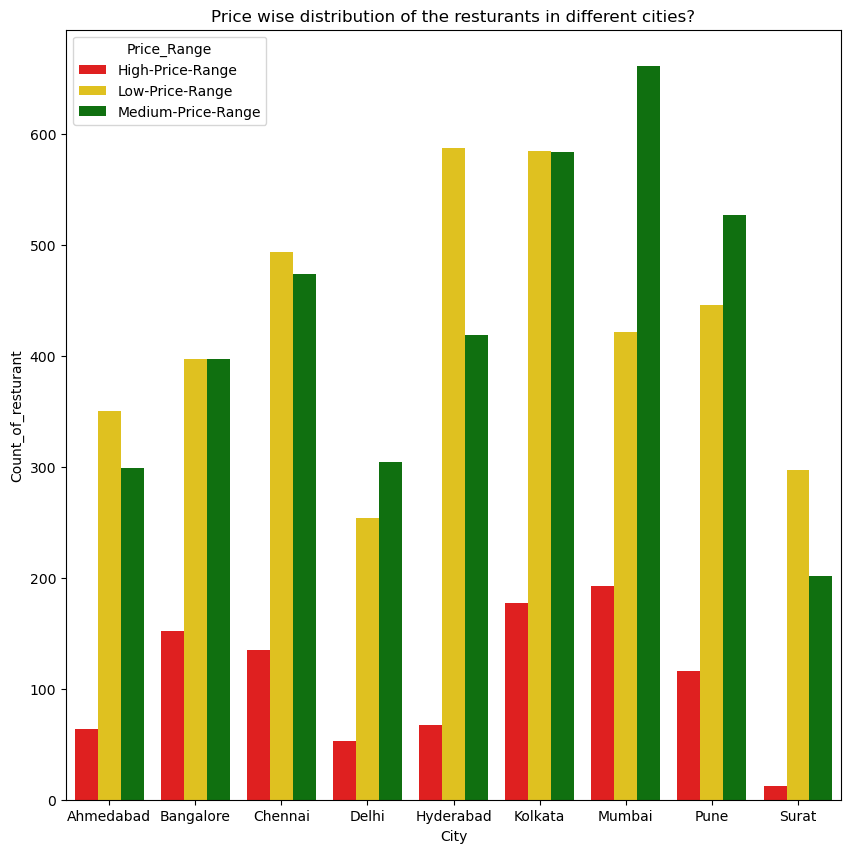

In [116]:
plt.figure(figsize=(10,10))
plt.title("Price wise distribution of the resturants in different cities?")
plotting=sns.barplot(data=grouping_dataframe,x=grouping_dataframe['City'],y=grouping_dataframe['Count_of_resturant'], hue=grouping_dataframe['Price_Range'], palette=["Red","Gold","Green"])

### Find out the correlation and covariance relationship between Price and Rating? 

What is covariance vs correlation?

Covariance tells us the direction of the relationship between two variables, while correlation provides an indication as to how strong the relationship between the two variables is, in addition to the direction of correlated variables. Correlation values range from +1 to -1.

In [111]:
swiggy_data_edit_1.head(5)

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time,Price_Range
0,211,Koramangala,Bangalore,Tandoor Hut,300,4.4,100,"Biryani,Chinese,North-Indian,South Indian",5Th Block,59,Medium-Price-Range
1,221,Koramangala,Bangalore,Tunday Kababi,300,4.1,100,"Mughlai,Lucknowi",5Th Block,56,Medium-Price-Range
2,246,Jogupalya,Bangalore,Kim Lee,650,4.4,100,Chinese,Double Road,50,High-Price-Range
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250,3.9,500,"North-Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57,Low-Price-Range
4,249,Indiranagar,Bangalore,Nh8,350,4.0,50,"Rajasthani,Gujarati,North-Indian,Snacks,Desser...",80 Feet Road,63,Medium-Price-Range


In [112]:
for_covarience_and_correlation = swiggy_data_edit_1[['Price','Avg ratings']]
for_covarience_and_correlation.head(5)

,Price,Avg ratings
0,300,4.4
1,300,4.1
2,650,4.4
3,250,3.9
4,350,4.0


In [113]:
for_covariance= for_covarience_and_correlation
for_covariance.cov()

,Price,Avg ratings
Price,53239.866240,16.819744
Avg ratings,16.819744,0.419415


**COVARIENCE**:-

1> Price(53239.866240) & Avg Ratings(0.419415):--> These are the ***VARIENCE*** of the particular columns, meaning that Price has a LARGE SPREAD compaired to Avg Ratings around the MEAN.


2> Price(16.819744) & Avg Rating (16.819744):--> These are the ***COVARIENCE*** between Price and Avg Rating telling us whether the two variables tend to move in the same direction or opposite directions. Since the number is a positive number, it is telling us that the variables have a positive relationship. Meaning that as the price is increasing, the Avg ratings is also increasing as well, although the relationship is not necessarily linear, and this is just an indication of the direction of change. 

3> It is telling us the direction of the relationship (positive or negative), it doesn’t provide information about the strength of the relationship.


In [114]:
for_correlation=for_covarience_and_correlation
for_correlation.corr()

,Price,Avg ratings
Price,1.000000,0.112559
Avg ratings,0.112559,1.000000


**CORRELATION**:-

1> Now, to understand better about the strength and direction of the relationship, we compute the correlation between the two variables.

2> Price(1.000000) & Avg ratings(1.000000):--> This is telling that the correlation between Price and Price is 1.000000 and correlation between Avg ratings and Avg ratings is also 1.000000, which is always true because a variable is perfectly correlated with itself.

3> Price(0.112559) & Avg ratings (0.112559):--> This is the correlation between Price and Avg ratings. This value is suggesting a weak positive linear relationship between these two variables. Meaning that as Price increases, there is a slight tendency for Avg ratings to increase as well, but the relationship is very weak. It is because a correlation of 0.112559 is close to 0, indicating that the relationship between these variables is not strong. 

4> Base of point 3, as the relationship is postively weak meaning that other factors are likely much more important in determining the average ratings.

5> Base of point 3, if it was 0 means that there will be no relationship between the variables.

<Axes: title={'center': 'ScatterPlot for Price and Avg Ratings'}, xlabel='Price', ylabel='Avg ratings'>

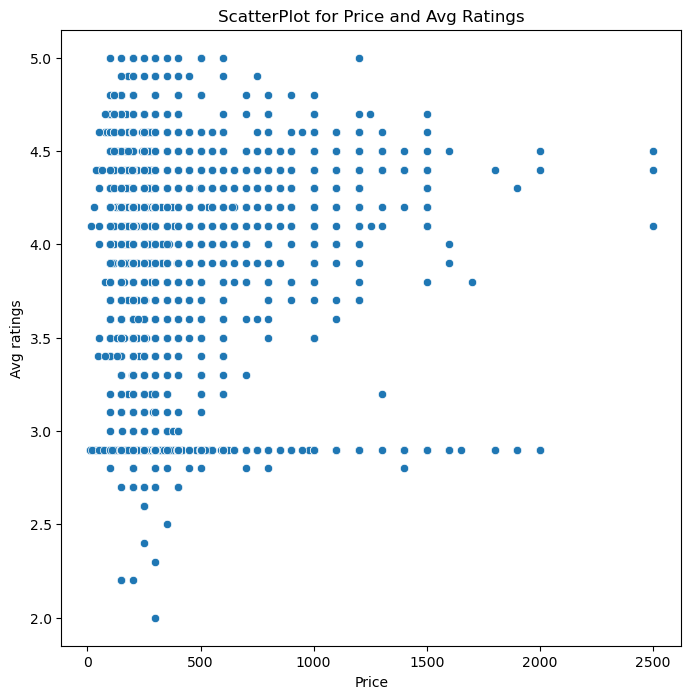

In [115]:
plt.figure(figsize=(8,8))
plt.title("ScatterPlot for Price and Avg Ratings")
sns.scatterplot(x= for_covarience_and_correlation['Price'], y=for_covarience_and_correlation['Avg ratings'])